# 

In [1]:
import tensorflow as tf
print(tf.__version__)


2.0.0-dev20190213


# work: model  9 10

In [2]:
#tf.enable_eager_execution()

In [3]:
tf.executing_eagerly()


True

In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import pydot_ng
%matplotlib inline

In [5]:
import mpld3
mpld3.enable_notebook()

In [6]:
data_dir = r'D:\python_code\data\stock\^NYA'
fname = os.path.join(data_dir, 'NYA 1981 2018 technical_custom_loss.csv')
df = pd.read_csv(fname)
df['Date'] = pd.to_datetime(df["Date"])
df_idx = df.set_index(["Date"], drop=True)
df_idx.head(5)

Close  vex_sign  cave_sign   <Open>   <High>   <Low>   <Volume>  \
Date                                                                           
1981-01-02  827.50         0          0   827.50   827.50  827.50          0   
1981-01-05  836.17         0          0   836.17   836.17  836.17          0   
1981-01-06  836.81         0          0   836.81   836.81  836.81          0   
1981-01-07  817.24         1          0   817.24   817.24  817.24          0   
1981-01-08  805.72         0          0   805.72   805.72  805.72          0   

             <ParCl>   <FastAvg>   <SlowAvg>  ...   INDPRO       RPI  PERMIT  \
Date                                          ...                              
1981-01-02       0.0         0.0         0.0  ...  52.4688  5723.536    1221   
1981-01-05       0.0         0.0         0.0  ...  52.4688  5723.536    1221   
1981-01-06       0.0         0.0         0.0  ...  52.4688  5723.536    1221   
1981-01-07       0.0         0.0         0.0  ...  52.4688  5723.536    1221   
1981-01-08       0.0         0.0         0.0  ...  52.4688  5723.536    1221   

            PAYEMS    ICSA  AWHMAN  PPIACO  USSLIND  STLFSI  USREC  
Date                                                                
1981-01-02   91037  399000    40.1    95.2      0.0     0.0      0  
1981-01-05   91037  410000    40.1    95.2      0.0     0.0      0  
1981-01-06   91037  410000    40.1    95.2      0.0     0.0      0  
1981-01-07   91037  410000    40.1    95.2      0.0     0.0      0  
1981-01-08   91037  410000    40.1    95.2      0.0     0.0      0  

[5 rows x 48 columns]

In [7]:
#把順序調換
df_idx = df_idx.sort_index(axis=0, ascending=False)
df_idx = df_idx.iloc[::-1]

In [8]:
df_idx.head(5)

Close  vex_sign  cave_sign   <Open>   <High>   <Low>   <Volume>  \
Date                                                                           
1981-01-02  827.50         0          0   827.50   827.50  827.50          0   
1981-01-05  836.17         0          0   836.17   836.17  836.17          0   
1981-01-06  836.81         0          0   836.81   836.81  836.81          0   
1981-01-07  817.24         1          0   817.24   817.24  817.24          0   
1981-01-08  805.72         0          0   805.72   805.72  805.72          0   

             <ParCl>   <FastAvg>   <SlowAvg>  ...   INDPRO       RPI  PERMIT  \
Date                                          ...                              
1981-01-02       0.0         0.0         0.0  ...  52.4688  5723.536    1221   
1981-01-05       0.0         0.0         0.0  ...  52.4688  5723.536    1221   
1981-01-06       0.0         0.0         0.0  ...  52.4688  5723.536    1221   
1981-01-07       0.0         0.0         0.0  ...  52.4688  5723.536    1221   
1981-01-08       0.0         0.0         0.0  ...  52.4688  5723.536    1221   

            PAYEMS    ICSA  AWHMAN  PPIACO  USSLIND  STLFSI  USREC  
Date                                                                
1981-01-02   91037  399000    40.1    95.2      0.0     0.0      0  
1981-01-05   91037  410000    40.1    95.2      0.0     0.0      0  
1981-01-06   91037  410000    40.1    95.2      0.0     0.0      0  
1981-01-07   91037  410000    40.1    95.2      0.0     0.0      0  
1981-01-08   91037  410000    40.1    95.2      0.0     0.0      0  

[5 rows x 48 columns]

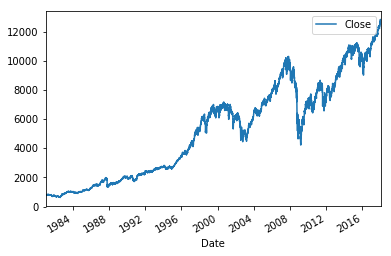

In [9]:
data = df_idx
data.plot(y='Close')

In [10]:
diff = data.index.values[-1] - data.index.values[0]
days = diff.astype('timedelta64[D]')
days = days / np.timedelta64(1, 'D')
years = int(days/365)
print("total data days:",days)
print("Total data: %d years"%years)
print("80 percent data = 1981 to %d"%(1981 + int(0.8*years)))
print(diff)

total data days: 13510.0
Total data: 37 years
80 percent data = 1981 to 2010
1167264000000000000 nanoseconds


In [11]:
#切割訓練與測試資料
split_date = pd.Timestamp('01-01-2011')

train = data.loc[:split_date]
test = data.loc[split_date:]
test_date = test.index
test_date = pd.to_datetime(test_date)


In [12]:
# 資料正規化

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

C:\Windows\system32\env002\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [13]:
#without sc
#train_sc = train
#test_sc = test

In [14]:
train_sc.shape

(7570, 48)

In [15]:
train_sc_df = pd.DataFrame(train_sc,index=train.index,columns=train.columns)
test_sc_df = pd.DataFrame(test_sc,index=test.index,columns=test.columns)



In [16]:
train_sc_df

Close  vex_sign  cave_sign    <Open>    <High>     <Low>  \
Date                                                                      
1981-01-02  0.021235       0.0        0.0  0.021235  0.021070  0.021381   
1981-01-05  0.022129       0.0        0.0  0.022129  0.021958  0.022282   
1981-01-06  0.022195       0.0        0.0  0.022195  0.022024  0.022348   
1981-01-07  0.020176       1.0        0.0  0.020176  0.020020  0.020315   
1981-01-08  0.018987       0.0        0.0  0.018987  0.018840  0.019118   
1981-01-09  0.019249       0.0        1.0  0.019249  0.019100  0.019382   
1981-01-12  0.019336       0.0        0.0  0.019336  0.019186  0.019469   
1981-01-13  0.019150       1.0        0.0  0.019150  0.019002  0.019282   
1981-01-14  0.019369       0.0        1.0  0.019369  0.019219  0.019502   
1981-01-15  0.019849       0.0        0.0  0.019849  0.019695  0.019985   
1981-01-16  0.020220       0.0        0.0  0.020220  0.020064  0.020360   
1981-01-19  0.019968       1.0        0.0  0.019968  0.019814  0.020106   
1981-01-20  0.018343       0.0        0.0  0.018343  0.018201  0.018469   
1981-01-21  0.018102       0.0        0.0  0.018103  0.017962  0.018227   
1981-01-22  0.017415       0.0        0.0  0.017415  0.017280  0.017535   
1981-01-23  0.017372       0.0        0.0  0.017372  0.017237  0.017492   
1981-01-26  0.017077       0.0        0.0  0.017077  0.016944  0.017194   
1981-01-27  0.017885       0.0        1.0  0.017885  0.017746  0.018008   
1981-01-28  0.017437       1.0        0.0  0.017437  0.017302  0.017557   
1981-01-29  0.017339       0.0        0.0  0.017339  0.017205  0.017458   
1981-01-30  0.016881       0.0        0.0  0.016881  0.016750  0.016997   
1981-02-02  0.015134       0.0        0.0  0.015134  0.015017  0.015239   
1981-02-03  0.016019       0.0        1.0  0.016019  0.015895  0.016129   
1981-02-04  0.016193       0.0        0.0  0.016193  0.016068  0.016305   
1981-02-05  0.016924       0.0        0.0  0.016924  0.016793  0.017041   
1981-02-06  0.017491       0.0        0.0  0.017492  0.017356  0.017612   
1981-02-09  0.016640       1.0        0.0  0.016640  0.016511  0.016755   
1981-02-10  0.016564       0.0        0.0  0.016564  0.016436  0.016678   
1981-02-11  0.016007       0.0        0.0  0.016008  0.015884  0.016118   
1981-02-12  0.015549       0.0        0.0  0.015549  0.015429  0.015656   
...              ...       ...        ...       ...       ...       ...   
2010-11-18  0.722218       0.0        0.0  0.708696  0.718258  0.713579   
2010-11-19  0.724400       0.0        0.0  0.722221  0.718850  0.720675   
2010-11-22  0.721223       1.0        0.0  0.724402  0.718793  0.717531   
2010-11-23  0.706824       0.0        0.0  0.721227  0.715642  0.709336   
2010-11-24  0.718020       0.0        1.0  0.706830  0.712482  0.711700   
2010-11-26  0.709896       1.0        0.0  0.718024  0.712464  0.713557   
2010-11-29  0.708121       0.0        0.0  0.709900  0.704403  0.703271   
2010-11-30  0.702713       0.0        0.0  0.708122  0.702639  0.702845   
2010-12-01  0.720545       0.0        1.0  0.702719  0.715562  0.707560   
2010-12-02  0.731745       0.0        0.0  0.720550  0.726345  0.725514   
2010-12-03  0.735803       0.0        0.0  0.731753  0.730542  0.734697   
2010-12-06  0.734680       1.0        0.0  0.735808  0.730421  0.737063   
2010-12-07  0.734571       0.0        0.0  0.734692  0.737713  0.739344   
2010-12-08  0.735673       0.0        1.0  0.734576  0.732390  0.735815   
2010-12-09  0.738957       0.0        0.0  0.735679  0.734444  0.740117   
2010-12-10  0.743205       0.0        0.0  0.738962  0.737652  0.742864   
2010-12-13  0.745963       0.0        0.0  0.743212  0.743988  0.748332   
2010-12-14  0.746499       0.0        0.0  0.745968  0.744327  0.749392   
2010-12-15  0.740675       1.0        0.0  0.746504  0.741767  0.744724   
2010-12-16  0.744953       0.0        1.0  0.740624  0.739401  0.743900   
2010-12-17  0.744444       1.0        0.

In [17]:
test_sc_df

Close  vex_sign  cave_sign    <Open>    <High>     <Low>  \
Date                                                                      
2011-01-03  0.765978       0.0        0.0  0.757734  0.762863  0.762954   
2011-01-04  0.763730       1.0        0.0  0.765986  0.761960  0.763485   
2011-01-05  0.765573       0.0        1.0  0.763734  0.760090  0.763599   
2011-01-06  0.761533       1.0        0.0  0.765576  0.760625  0.765030   
2011-01-07  0.759410       0.0        0.0  0.761538  0.757786  0.758497   
2011-01-10  0.757941       0.0        0.0  0.759413  0.753533  0.757270   
2011-01-11  0.763368       0.0        1.0  0.757948  0.758773  0.763170   
2011-01-12  0.774132       0.0        0.0  0.763380  0.768532  0.768640   
2011-01-13  0.773766       1.0        0.0  0.774137  0.770802  0.777234   
2011-01-14  0.779410       0.0        1.0  0.773769  0.773379  0.776632   
2011-01-18  0.781143       0.0        0.0  0.779416  0.775486  0.783895   
2011-01-19  0.772268       1.0        0.0  0.781146  0.776054  0.775931   
2011-01-20  0.769358       0.0        0.0  0.772267  0.766287  0.768274   
2011-01-21  0.772354       0.0        1.0  0.769363  0.771086  0.774663   
2011-01-24  0.777686       0.0        0.0  0.772356  0.772245  0.776860   
2011-01-25  0.776005       1.0        0.0  0.777689  0.771667  0.775139   
2011-01-26  0.781424       0.0        1.0  0.776018  0.776472  0.781365   
2011-01-27  0.782809       0.0        0.0  0.781429  0.778334  0.785025   
2011-01-28  0.767905       1.0        0.0  0.782814  0.777079  0.772429   
2011-01-31  0.775802       0.0        1.0  0.767911  0.770803  0.773201   
2011-02-01  0.791378       0.0        0.0  0.775811  0.785856  0.781156   
2011-02-02  0.789570       1.0        0.0  0.791380  0.786347  0.793940   
2011-02-03  0.791271       0.0        1.0  0.789574  0.785829  0.788143   
2011-02-04  0.791214       1.0        0.0  0.791277  0.785149  0.791312   
2011-02-07  0.796182       0.0        1.0  0.791223  0.792077  0.796674   
2011-02-08  0.800641       0.0        0.0  0.796188  0.794529  0.800151   
2011-02-09  0.796941       1.0        0.0  0.800646  0.794446  0.798721   
2011-02-10  0.796233       0.0        0.0  0.796940  0.790890  0.794649   
2011-02-11  0.800129       0.0        1.0  0.796237  0.795120  0.797131   
2011-02-14  0.803252       0.0        0.0  0.800134  0.797521  0.804999   
...              ...       ...        ...       ...       ...       ...   
2017-11-16  1.205541       0.0        1.0  1.200956  1.198120  1.209230   
2017-11-17  1.205501       1.0        0.0  1.203278  1.197382  1.211156   
2017-11-20  1.207346       0.0        1.0  1.205898  1.199061  1.212990   
2017-11-21  1.214067       0.0        0.0  1.210636  1.205843  1.218976   
2017-11-22  1.214576       0.0        0.0  1.216164  1.207833  1.221857   
2017-11-24  1.217786       0.0        0.0  1.217976  1.209363  1.225921   
2017-11-27  1.214572       1.0        0.0  1.217730  1.208915  1.222897   
2017-11-28  1.227931       0.0        1.0  1.216784  1.218779  1.224904   
2017-11-29  1.232171       0.0        0.0  1.228900  1.224530  1.237367   
2017-11-30  1.239032       0.0        0.0  1.235794  1.234145  1.243122   
2017-12-01  1.237666       1.0        0.0  1.239961  1.231645  1.230538   
2017-12-04  1.239764       0.0        1.0  1.245023  1.239347  1.248104   
2017-12-05  1.232774       1.0        0.0  1.239857  1.230733  1.240478   
2017-12-06  1.229190       0.0        0.0  1.231028  1.223076  1.236835   
2017-12-07  1.232962       0.0        1.0  1.227674  1.224697  1.235546   
2017-12-08  1.240607       0.0        0.0  1.236687  1.231014  1.243400   
2017-12-11  1.243203       0.0        0.0  1.241651  1.233694  1.250002   
2017-12-12  1.246254       0.0        0.0  1.244499  1.238588  1.252469   
2017-12-13  1.246430       0.0        0.0  1.247426  1.240914  1.255024   
2017-12-14  1.239163       1.0        0.0  1.247191  1.238254  1.247708   
2017-12-15  1.246450       0.0        1.

In [18]:
for s in range(-5,-4):
    train_sc_df['Y_{}'.format(s)] = train_sc_df['Close'].shift(s)
    test_sc_df['Y_{}'.format(s)] = test_sc_df['Close'].shift(s)



In [19]:
train_sc_df

Close  vex_sign  cave_sign    <Open>    <High>     <Low>  \
Date                                                                      
1981-01-02  0.021235       0.0        0.0  0.021235  0.021070  0.021381   
1981-01-05  0.022129       0.0        0.0  0.022129  0.021958  0.022282   
1981-01-06  0.022195       0.0        0.0  0.022195  0.022024  0.022348   
1981-01-07  0.020176       1.0        0.0  0.020176  0.020020  0.020315   
1981-01-08  0.018987       0.0        0.0  0.018987  0.018840  0.019118   
1981-01-09  0.019249       0.0        1.0  0.019249  0.019100  0.019382   
1981-01-12  0.019336       0.0        0.0  0.019336  0.019186  0.019469   
1981-01-13  0.019150       1.0        0.0  0.019150  0.019002  0.019282   
1981-01-14  0.019369       0.0        1.0  0.019369  0.019219  0.019502   
1981-01-15  0.019849       0.0        0.0  0.019849  0.019695  0.019985   
1981-01-16  0.020220       0.0        0.0  0.020220  0.020064  0.020360   
1981-01-19  0.019968       1.0        0.0  0.019968  0.019814  0.020106   
1981-01-20  0.018343       0.0        0.0  0.018343  0.018201  0.018469   
1981-01-21  0.018102       0.0        0.0  0.018103  0.017962  0.018227   
1981-01-22  0.017415       0.0        0.0  0.017415  0.017280  0.017535   
1981-01-23  0.017372       0.0        0.0  0.017372  0.017237  0.017492   
1981-01-26  0.017077       0.0        0.0  0.017077  0.016944  0.017194   
1981-01-27  0.017885       0.0        1.0  0.017885  0.017746  0.018008   
1981-01-28  0.017437       1.0        0.0  0.017437  0.017302  0.017557   
1981-01-29  0.017339       0.0        0.0  0.017339  0.017205  0.017458   
1981-01-30  0.016881       0.0        0.0  0.016881  0.016750  0.016997   
1981-02-02  0.015134       0.0        0.0  0.015134  0.015017  0.015239   
1981-02-03  0.016019       0.0        1.0  0.016019  0.015895  0.016129   
1981-02-04  0.016193       0.0        0.0  0.016193  0.016068  0.016305   
1981-02-05  0.016924       0.0        0.0  0.016924  0.016793  0.017041   
1981-02-06  0.017491       0.0        0.0  0.017492  0.017356  0.017612   
1981-02-09  0.016640       1.0        0.0  0.016640  0.016511  0.016755   
1981-02-10  0.016564       0.0        0.0  0.016564  0.016436  0.016678   
1981-02-11  0.016007       0.0        0.0  0.016008  0.015884  0.016118   
1981-02-12  0.015549       0.0        0.0  0.015549  0.015429  0.015656   
...              ...       ...        ...       ...       ...       ...   
2010-11-18  0.722218       0.0        0.0  0.708696  0.718258  0.713579   
2010-11-19  0.724400       0.0        0.0  0.722221  0.718850  0.720675   
2010-11-22  0.721223       1.0        0.0  0.724402  0.718793  0.717531   
2010-11-23  0.706824       0.0        0.0  0.721227  0.715642  0.709336   
2010-11-24  0.718020       0.0        1.0  0.706830  0.712482  0.711700   
2010-11-26  0.709896       1.0        0.0  0.718024  0.712464  0.713557   
2010-11-29  0.708121       0.0        0.0  0.709900  0.704403  0.703271   
2010-11-30  0.702713       0.0        0.0  0.708122  0.702639  0.702845   
2010-12-01  0.720545       0.0        1.0  0.702719  0.715562  0.707560   
2010-12-02  0.731745       0.0        0.0  0.720550  0.726345  0.725514   
2010-12-03  0.735803       0.0        0.0  0.731753  0.730542  0.734697   
2010-12-06  0.734680       1.0        0.0  0.735808  0.730421  0.737063   
2010-12-07  0.734571       0.0        0.0  0.734692  0.737713  0.739344   
2010-12-08  0.735673       0.0        1.0  0.734576  0.732390  0.735815   
2010-12-09  0.738957       0.0        0.0  0.735679  0.734444  0.740117   
2010-12-10  0.743205       0.0        0.0  0.738962  0.737652  0.742864   
2010-12-13  0.745963       0.0        0.0  0.743212  0.743988  0.748332   
2010-12-14  0.746499       0.0        0.0  0.745968  0.744327  0.749392   
2010-12-15  0.740675       1.0        0.0  0.746504  0.741767  0.744724   
2010-12-16  0.744953       0.0        1.0  0.740624  0.739401  0.743900   
2010-12-17  0.744444       1.0        0.

In [20]:
test_sc_df

Close  vex_sign  cave_sign    <Open>    <High>     <Low>  \
Date                                                                      
2011-01-03  0.765978       0.0        0.0  0.757734  0.762863  0.762954   
2011-01-04  0.763730       1.0        0.0  0.765986  0.761960  0.763485   
2011-01-05  0.765573       0.0        1.0  0.763734  0.760090  0.763599   
2011-01-06  0.761533       1.0        0.0  0.765576  0.760625  0.765030   
2011-01-07  0.759410       0.0        0.0  0.761538  0.757786  0.758497   
2011-01-10  0.757941       0.0        0.0  0.759413  0.753533  0.757270   
2011-01-11  0.763368       0.0        1.0  0.757948  0.758773  0.763170   
2011-01-12  0.774132       0.0        0.0  0.763380  0.768532  0.768640   
2011-01-13  0.773766       1.0        0.0  0.774137  0.770802  0.777234   
2011-01-14  0.779410       0.0        1.0  0.773769  0.773379  0.776632   
2011-01-18  0.781143       0.0        0.0  0.779416  0.775486  0.783895   
2011-01-19  0.772268       1.0        0.0  0.781146  0.776054  0.775931   
2011-01-20  0.769358       0.0        0.0  0.772267  0.766287  0.768274   
2011-01-21  0.772354       0.0        1.0  0.769363  0.771086  0.774663   
2011-01-24  0.777686       0.0        0.0  0.772356  0.772245  0.776860   
2011-01-25  0.776005       1.0        0.0  0.777689  0.771667  0.775139   
2011-01-26  0.781424       0.0        1.0  0.776018  0.776472  0.781365   
2011-01-27  0.782809       0.0        0.0  0.781429  0.778334  0.785025   
2011-01-28  0.767905       1.0        0.0  0.782814  0.777079  0.772429   
2011-01-31  0.775802       0.0        1.0  0.767911  0.770803  0.773201   
2011-02-01  0.791378       0.0        0.0  0.775811  0.785856  0.781156   
2011-02-02  0.789570       1.0        0.0  0.791380  0.786347  0.793940   
2011-02-03  0.791271       0.0        1.0  0.789574  0.785829  0.788143   
2011-02-04  0.791214       1.0        0.0  0.791277  0.785149  0.791312   
2011-02-07  0.796182       0.0        1.0  0.791223  0.792077  0.796674   
2011-02-08  0.800641       0.0        0.0  0.796188  0.794529  0.800151   
2011-02-09  0.796941       1.0        0.0  0.800646  0.794446  0.798721   
2011-02-10  0.796233       0.0        0.0  0.796940  0.790890  0.794649   
2011-02-11  0.800129       0.0        1.0  0.796237  0.795120  0.797131   
2011-02-14  0.803252       0.0        0.0  0.800134  0.797521  0.804999   
...              ...       ...        ...       ...       ...       ...   
2017-11-16  1.205541       0.0        1.0  1.200956  1.198120  1.209230   
2017-11-17  1.205501       1.0        0.0  1.203278  1.197382  1.211156   
2017-11-20  1.207346       0.0        1.0  1.205898  1.199061  1.212990   
2017-11-21  1.214067       0.0        0.0  1.210636  1.205843  1.218976   
2017-11-22  1.214576       0.0        0.0  1.216164  1.207833  1.221857   
2017-11-24  1.217786       0.0        0.0  1.217976  1.209363  1.225921   
2017-11-27  1.214572       1.0        0.0  1.217730  1.208915  1.222897   
2017-11-28  1.227931       0.0        1.0  1.216784  1.218779  1.224904   
2017-11-29  1.232171       0.0        0.0  1.228900  1.224530  1.237367   
2017-11-30  1.239032       0.0        0.0  1.235794  1.234145  1.243122   
2017-12-01  1.237666       1.0        0.0  1.239961  1.231645  1.230538   
2017-12-04  1.239764       0.0        1.0  1.245023  1.239347  1.248104   
2017-12-05  1.232774       1.0        0.0  1.239857  1.230733  1.240478   
2017-12-06  1.229190       0.0        0.0  1.231028  1.223076  1.236835   
2017-12-07  1.232962       0.0        1.0  1.227674  1.224697  1.235546   
2017-12-08  1.240607       0.0        0.0  1.236687  1.231014  1.243400   
2017-12-11  1.243203       0.0        0.0  1.241651  1.233694  1.250002   
2017-12-12  1.246254       0.0        0.0  1.244499  1.238588  1.252469   
2017-12-13  1.246430       0.0        0.0  1.247426  1.240914  1.255024   
2017-12-14  1.239163       1.0        0.0  1.247191  1.238254  1.247708   
2017-12-15  1.246450       0.0        1.

In [21]:
#X_train = train_sc_df.dropna().drop('Y', axis=1)
X_train = train_sc_df.dropna().drop('Y_-5', axis=1)
y_train = train_sc_df.dropna()['Y_-5']
X_train = X_train.as_matrix()
y_train = y_train.as_matrix()
vex_sign_train = train.dropna()['vex_sign']
vex_sign_train = vex_sign_train[5:]
vex_sign_train = vex_sign_train.as_matrix()
cave_sign_train = train.dropna()['cave_sign']
cave_sign_train = cave_sign_train[5:]
cave_sign_train = cave_sign_train.as_matrix()

C:\Windows\system32\env002\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Windows\system32\env002\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\Windows\system32\env002\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Windows\system32\env002\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


In [22]:
vex_sign_train[0:7]

array([0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [23]:
vex_sign_train.shape

(7565,)

In [24]:
X_train

array([[0.02123455, 0.        , 0.        , ..., 0.44481605, 0.1198527 ,
        0.        ],
       [0.0221293 , 0.        , 0.        , ..., 0.44481605, 0.1198527 ,
        0.        ],
       [0.02219534, 0.        , 0.        , ..., 0.44481605, 0.1198527 ,
        0.        ],
       ...,
       [0.75175002, 0.        , 0.        , ..., 0.68896321, 0.03615668,
        0.        ],
       [0.75439815, 0.        , 0.        , ..., 0.68896321, 0.03615668,
        0.        ],
       [0.75373767, 1.        , 0.        , ..., 0.68896321, 0.03615668,
        0.        ]])

In [25]:
X_train.shape

(7565, 48)

In [26]:
y_train.shape

(7565,)

In [27]:
X_test = test_sc_df.dropna().drop('Y_-5', axis=1)
y_test = test_sc_df.dropna().dropna()['Y_-5']
X_test = X_test.as_matrix()
y_test = y_test.as_matrix()
vex_sign_test = test.dropna().dropna()['vex_sign']
vex_sign_test = vex_sign_test[5:]
vex_sign_test = vex_sign_test.as_matrix()
cave_sign_test = test.dropna().dropna()['cave_sign']
cave_sign_test = cave_sign_test[5:]
cave_sign_test = cave_sign_test.as_matrix()

C:\Windows\system32\env002\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Windows\system32\env002\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Windows\system32\env002\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\Windows\system32\env002\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


In [28]:
y_train

array([0.01924897, 0.01933566, 0.0191499 , ..., 0.75746527, 0.75647764,
       0.7577274 ])

In [29]:
X_test

array([[ 0.76597828,  0.        ,  0.        , ...,  0.67892977,
         0.02360228,  0.        ],
       [ 0.76372954,  1.        ,  0.        , ...,  0.67892977,
         0.02360228,  0.        ],
       [ 0.76557271,  0.        ,  1.        , ...,  0.67892977,
         0.02360228,  0.        ],
       ...,
       [ 1.25138934,  1.        ,  0.        , ...,  0.68060201,
        -0.1282223 ,  0.        ],
       [ 1.25139037,  0.        ,  1.        , ...,  0.68060201,
        -0.1282223 ,  0.        ],
       [ 1.25682491,  0.        ,  0.        , ...,  0.68060201,
        -0.1282223 ,  0.        ]])

In [30]:
y_test

array([0.75794103, 0.76336834, 0.77413216, ..., 1.25907262, 1.26228216,
       1.25771553])

In [31]:
print('Train size: (%d x %d)'%(X_train.shape[0], X_train.shape[1]))
print('Test size: (%d x %d)'%(X_test.shape[0], X_test.shape[1]))

Train size: (7565 x 48)
Test size: (1756 x 48)


# setup

In [32]:
loss_imagepath ='images/loss/'
predict_imagepath ='images/predict/'
losspath = 'csv/loss/'
model_dirpath = 'h5/'
file_name='file_name'

#for func initiate
history_model='history_model'
input_tensor='input_tensor'
vex_sign='vex_sign'
cave_sign='cave_sign'
y_pred='y_pred'
Target_DirPath='Target_DirPath'
test_date_trim='test_date_trim'

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Add,Reshape,Lambda
from tensorflow.keras.optimizers import Adam, RMSprop
import tensorflow.keras.backend as K
from sklearn.metrics import r2_score
from tensorflow.keras.callbacks import EarlyStopping,CSVLogger
from tensorflow.keras.layers import LSTM
from tensorflow.keras import Input,layers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import PReLU
from tensorflow.keras.utils import plot_model

#from tcn import compiled_tcn,TCN

def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


val_split_ratio = 0.1

In [34]:
def plot_model_architecture(model, file_name):
    file_path = 'images/model/{}.png'.format(file_name)
    if not os.path.exists(os.path.dirname(file_path)):
        try:
            os.makedirs(os.path.dirname(file_path))
        except OSError as exc: # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise

    plot_model(model, to_file=file_path, show_shapes=True)

In [35]:
def loadmodel(model_dirpath=model_dirpath,file_name=file_name):
    model = load_model(model_dirpath + file_name + '.h5')
    return model
def loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name):
    import matplotlib.pyplot as plt
    print(history_model.history.keys())
    loss = history_model.history['loss']
    val_loss = history_model.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    if (not (os.path.exists(loss_imagepath))):
                os.makedirs(loss_imagepath)
    plt.savefig(loss_imagepath +  file_name +'_loss.png')
def CSV(losspath=losspath, file_name=file_name):
    csv_logger = CSVLogger(losspath + file_name + '_log.csv')
    return csv_logger
def predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,
                  vex_sign=vex_sign,cave_sign=cave_sign,
                  predict_imagepath=predict_imagepath, file_name=file_name):
    from sklearn.metrics import r2_score
    y_pred = model.predict([X_tst_t,vex_sign,cave_sign])
    #y_pred是三天前就知道，所以往前移三格
    y_test_pic = y_test[:]
    y_pred_pic = y_pred[5:]
    y_test_rsquare = y_test[:]
    plt.plot(y_test_pic, label='True')
    plt.plot(y_pred_pic, label='pred')
    plt.xlabel('Observation')
    plt.ylabel('Scaled_Value')
    plt.legend()
    print("y_pred.shape:",y_pred.shape)
    print("y_test_rsquare.shape:",y_test_rsquare.shape)
    r2_test = r2_score(y_test_rsquare, y_pred)
    print('R-Squared: %f'%(r2_test))
    print("The Adjusted R2 score on the Test set is:\t{:0.3f}"\
          .format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))
    if (not (os.path.exists(predict_imagepath))):
            os.makedirs(predict_imagepath)
    plt.savefig(predict_imagepath +  file_name +'_loss.png')
    plt.show()    
    return y_pred
def save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,\
             file_name=file_name,test_date=test_date):
    # 把價格縮放解除
    ## create empty table with label fields
    y_pred_data_like = np.zeros(shape=(len(y_pred), X_train.shape[1]))
    ## put the predicted values in the right field
    y_pred_data_like[:,0] = y_pred[:,0]
    ## inverse transform and then select the right field
    y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

    #檢查測試資料的維度
    yd_size = X_test.shape[0]

    # 把價格轉換維度
    yd = y_pred_data.reshape(yd_size,)

    #把最後X天刪除(預測X天後)
    test_date_trim = np.delete(test_date, np.s_[-5:])

    # 製作CSV
    AnalysisResult = pd.DataFrame()
    Date = pd.Series(test_date_trim)
    Close = pd.Series(yd)
    Date.name = 'Date'
    Close.name = 'Close'

    # 因為放在MC要開高低收，所以複製收盤填入
    Open = Close.copy()
    High = Close.copy()
    Low = Close.copy()
    Open.name = 'Open'
    High.name = 'High'
    Low.name = 'Low'

    AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
    AnalysisResult = pd.concat([AnalysisResult,Close], axis=1)
    AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
    AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
    AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

    # 輸出CSV檔案
    import os
    Target_DirPath = 'Deep-Learning-in-Python-master/'
    if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
    AnalysisResult.to_csv(Target_DirPath + file_name+'.csv', mode='w', header=True, index=False)

# loss func

In [36]:
def mean_squared_error(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

In [37]:
def tf_stock_loss(vex_sign):
    def loss(y_true, y_pred):
        alpha=50
        y_pred_previous= tf.roll(y_pred, shift=-1, axis=0)

        rising = tf.where(y_pred_previous < y_pred, tf.constant(1,shape = tf.shape(y_pred)),
                          tf.constant(0,shape = tf.shape(y_pred))
                         )
        falling = tf.where(y_pred_previous > y_pred, tf.constant(1,shape = tf.shape(y_pred)),
                           tf.constant(0,shape = tf.shape(y_pred))
                          )
        convex= tf.math.equal(vex_sign,tf.ones(shape = tf.shape(vex_sign)))
        concave= tf.math.equal(vex_sign,tf.constant(2,shape = tf.shape(vex_sign)))
        def f1(): return alpha*tf.square(y_pred - y_true)+tf.square(y_pred - y_true)
        def f2(): return tf.square(y_pred - y_true)
        losses = tf.case({tf.logical_and(convex,rising): f1, tf.logical_and(concave,falling): f1},\
         default=f2, exclusive=True)
        loss = tf.math.reduce_sum(losses)
        loss = tf.math.divide(loss, tf.TensorShape(losses))
        return loss
    return loss

In [38]:
def tf_stock_loss_2(vex_sign,cave_sign):
    def loss(y_true, y_pred):
        alpha=5
        y_pred_previous= tf.roll(y_pred, shift=-1, axis=0)

        def f1(): return alpha*tf.square(y_pred - y_true)+tf.square(y_pred - y_true)
        def f2(): return tf.square(y_pred - y_true)
        losses = tf.case({tf.squeeze(tf.math.less(y_pred_previous,y_pred)): f1,\
                          tf.squeeze(tf.math.greater(y_pred_previous,y_pred)): f1},\
                          default=f2, exclusive=False)      
        loss = tf.math.reduce_sum(losses)
        loss = tf.math.divide(loss, tf.TensorShape(losses))
        return loss
    return loss


In [39]:
def tf_stock_loss_3(vex_sign,cave_sign):
    def loss(y_true, y_pred):
        penalty=5
        y_pred_previous= tf.roll(y_pred, shift=-1, axis=0)

        rising = tf.where(y_pred_previous < y_pred, tf.constant(1,shape = tf.shape(y_pred)),
                          tf.constant(0,shape = tf.shape(y_pred))
                         )
        falling = tf.where(y_pred_previous > y_pred, tf.constant(1,shape = tf.shape(y_pred)),
                           tf.constant(0,shape = tf.shape(y_pred))
                          )
        convex= tf.math.equal(vex_sign,tf.ones(shape = tf.shape(vex_sign)))
        concave= tf.math.equal(vex_sign,tf.constant(2,shape = tf.shape(vex_sign)))
        losses = tf.logical_and(convex,rising)*penalty*tf.square(y_pred - y_true)+\
                 tf.logical_and(concave,falling)*penalty*tf.square(y_pred - y_true)+\
                 tf.square(y_pred - y_true)
        loss = tf.math.reduce_sum(losses)
        loss = tf.math.divide(loss, tf.TensorShape(losses))
        return loss
    return loss

In [40]:
def tf_stock_loss_4(vex_sign,cave_sign):
    def loss(y_true, y_pred):
        penalty=10
        y_pred_previous= tf.roll(y_pred, shift=-1, axis=0)

        rising = K.less(y_pred_previous,y_pred)
        falling = K.greater(y_pred_previous ,y_pred)
        convex= K.equal(vex_sign,tf.ones(shape = tf.shape(vex_sign)))
        """concave= K.equal(vex_sign,tf.constant(2,shape = tf.shape(vex_sign)))"""
        losses = tf.keras.backend.cast(rising,dtype='float32')*penalty* mean_squared_error(y_true, y_pred)+mean_squared_error(y_true, y_pred)
        #losses = K.all(K.stack([convex, rising], axis=0), axis=0)*penalty* mean_squared_error(y_true, y_pred)+mean_squared_error(y_true, y_pred)
        """K.all(K.stack([concave, falling], axis=0), axis=0)*penalty** mean_squared_error(y_true, y_pred)+"""
        return losses
    return loss

In [41]:
def tf_stock_loss_5(vex_sign,cave_sign):
    def loss(y_true, y_pred):
        penalty=10
        y_pred_previous= tf.roll(y_pred, shift=-1, axis=0)
        rising = K.less(y_pred_previous,y_pred)
        falling = K.greater(y_pred_previous ,y_pred)
        convex= K.equal(vex_sign,tf.ones(shape = tf.shape(vex_sign)))
        concave= K.equal(cave_sign,tf.ones(shape = tf.shape(cave_sign)))
        losses = tf.keras.backend.cast(tf.logical_and(convex,rising),dtype='float32')*penalty* mean_squared_error(y_true, y_pred)+\
                 tf.keras.backend.cast(tf.logical_and(concave,falling),dtype='float32')*penalty*mean_squared_error(y_true, y_pred)+\
                 mean_squared_error(y_true, y_pred)
        #losses = K.all(K.stack([convex, rising], axis=0), axis=0)*penalty* mean_squared_error(y_true, y_pred)+mean_squared_error(y_true, y_pred)
        """K.all(K.stack([concave, falling], axis=0), axis=0)*penalty** mean_squared_error(y_true, y_pred)+"""
        return losses
    return loss

In [42]:
"""
autograph = tf.autograph
tf_stock_loss_2 = autograph.to_graph(stock_loss_2)
"""

'\nautograph = tf.autograph\ntf_stock_loss_2 = autograph.to_graph(stock_loss_2)\n'

# tcn

In [43]:
act_of_skip_connections='selu'

In [44]:
import tensorflow.keras.backend as K
import tensorflow.keras.layers
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Activation, Lambda
from tensorflow.keras.layers import Conv1D, SpatialDropout1D
from tensorflow.keras.layers import Convolution1D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import Input

from typing import List, Tuple


def channel_normalization(x):
    # type: (Layer) -> Layer
    """ Normalize a layer to the maximum activation

    This keeps a layers values between zero and one.
    It helps with relu's unbounded activation

    Args:
        x: The layer to normalize

    Returns:
        A maximal normalized layer
    """
    max_values = K.max(K.abs(x), 2, keepdims=True) + 1e-5
    out = x / max_values
    return out


def wave_net_activation(x):
    # type: (Layer) -> Layer
    """This method defines the activation used for WaveNet

    described in https://deepmind.com/blog/wavenet-generative-model-raw-audio/

    Args:
        x: The layer we want to apply the activation to

    Returns:
        A new layer with the wavenet activation applied
    """
    tanh_out = Activation('tanh')(x)
    sigm_out = Activation('sigmoid')(x)
    return tensorflow.keras.layers.multiply([tanh_out, sigm_out])


def residual_block(x, s, i, activation, nb_filters, kernel_size, padding, dropout_rate=0, name=''):
    # type: (Layer, int, int, str, int, int, str, float, str) -> Tuple[Layer, Layer]
    """Defines the residual block for the WaveNet TCN

    Args:
        x: The previous layer in the model
        s: The stack index i.e. which stack in the overall TCN
        i: The dilation power of 2 we are using for this residual block
        activation: The name of the type of activation to use
        nb_filters: The number of convolutional filters to use in this block
        kernel_size: The size of the convolutional kernel
        padding: The padding used in the convolutional layers, 'same' or 'causal'.
        dropout_rate: Float between 0 and 1. Fraction of the input units to drop.
        name: Name of the model. Useful when having multiple TCN.

    Returns:
        A tuple where the first element is the residual model layer, and the second
        is the skip connection.
    """

    original_x = x
    conv = Conv1D(filters=nb_filters, kernel_size=kernel_size,
                  dilation_rate=i, padding=padding,
                  name=name + '_d_%s_conv_%d_tanh_s%d' % (padding, i, s))(x)
    if activation == 'norm_relu':
        x = Activation('relu')(conv)
        x = Lambda(channel_normalization)(x)
    elif activation == 'wavenet':
        x = wave_net_activation(conv)
    else:
        x = Activation(activation)(conv)

    x = SpatialDropout1D(dropout_rate, name=name + '_spatial_dropout1d_%d_s%d_%f' % (i, s, dropout_rate))(x)

    # 1x1 conv.
    x = Convolution1D(nb_filters, 1, padding='same')(x)
    res_x = tensorflow.keras.layers.add([original_x, x])
    return res_x, x


def process_dilations(dilations):
    def is_power_of_two(num):
        return num != 0 and ((num & (num - 1)) == 0)

    if all([is_power_of_two(i) for i in dilations]):
        return dilations

    else:
        new_dilations = [2 ** i for i in dilations]
        # print(f'Updated dilations from {dilations} to {new_dilations} because of backwards compatibility.')
        return new_dilations


class TCN:
    """Creates a TCN layer.

        Input shape:
            A tensor of shape (batch_size, timesteps, input_dim).

        Args:
            nb_filters: The number of filters to use in the convolutional layers.
            kernel_size: The size of the kernel to use in each convolutional layer.
            dilations: The list of the dilations. Example is: [1, 2, 4, 8, 16, 32, 64].
            nb_stacks : The number of stacks of residual blocks to use.
            activation: The activations to use (norm_relu, wavenet, relu...).
            padding: The padding to use in the convolutional layers, 'causal' or 'same'.
            use_skip_connections: Boolean. If we want to add skip connections from input to each residual block.
            return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.
            dropout_rate: Float between 0 and 1. Fraction of the input units to drop.
            name: Name of the model. Useful when having multiple TCN.

        Returns:
            A TCN layer.
        """

    def __init__(self,
                 nb_filters=64,
                 kernel_size=2,
                 nb_stacks=1,
                 dilations=[1, 2, 4, 8, 16, 32],
                 activation='norm_relu',
                 padding='causal',
                 use_skip_connections=True,
                 dropout_rate=0.0,
                 return_sequences=True,
                 name='tcn'):
        self.name = name
        self.return_sequences = return_sequences
        self.dropout_rate = dropout_rate
        self.use_skip_connections = use_skip_connections
        self.activation = activation
        self.dilations = dilations
        self.nb_stacks = nb_stacks
        self.kernel_size = kernel_size
        self.nb_filters = nb_filters
        self.padding = padding

        if padding != 'causal' and padding != 'same':
            raise ValueError("Only 'causal' or 'same' padding are compatible for this layer.")

        if not isinstance(nb_filters, int):
            print('An interface change occurred after the version 2.1.2.')
            print('Before: tcn.TCN(i, return_sequences=False, ...)')
            print('Now should be: tcn.TCN(return_sequences=False, ...)(i)')
            print('Second solution is to pip install keras-tcn==2.1.2 to downgrade.')
            raise Exception()

    def __call__(self, inputs, Activation_of_skip_connections='selu'):
        x = inputs
        x = Convolution1D(self.nb_filters, 1, padding=self.padding, name=self.name + '_initial_conv')(x)
        skip_connections = []
        for s in range(self.nb_stacks):
            for i in self.dilations:
                x, skip_out = residual_block(x, s, i, self.activation, self.nb_filters,
                                             self.kernel_size, self.padding, self.dropout_rate, name=self.name)
                skip_connections.append(skip_out)
        if self.use_skip_connections:
            x = tensorflow.keras.layers.add(skip_connections)
        x = Activation(Activation_of_skip_connections)(x)

        if not self.return_sequences:
            output_slice_index = -1
            x = Lambda(lambda tt: tt[:, output_slice_index, :])(x)
        return x


def compiled_tcn(num_feat,  # type: int
                 num_classes,  # type: int
                 nb_filters,  # type: int
                 kernel_size,  # type: int
                 dilations,  # type: List[int]
                 nb_stacks,  # type: int
                 max_len,  # type: int
                 activation='norm_relu',  # type: str
                 padding='causal',  # type: str
                 use_skip_connections=True,  # type: bool
                 return_sequences=True,
                 regression=False,  # type: bool
                 dropout_rate=0.05,  # type: float
                 name='tcn'  # type: str
                 ):
    # type: (...) -> tensorflow.keras.Model
    """Creates a compiled TCN model for a given task (i.e. regression or classification).

    Args:
        num_feat: The number of features of your input, i.e. the last dimension of: (batch_size, timesteps, input_dim).
        num_classes: The size of the final dense layer, how many classes we are predicting.
        nb_filters: The number of filters to use in the convolutional layers.
        kernel_size: The size of the kernel to use in each convolutional layer.
        dilations: The list of the dilations. Example is: [1, 2, 4, 8, 16, 32, 64].
        nb_stacks : The number of stacks of residual blocks to use.
        max_len: The maximum sequence length, use None if the sequence length is dynamic.
        activation: The activations to use.
        padding: The padding to use in the convolutional layers.
        use_skip_connections: Boolean. If we want to add skip connections from input to each residual block.
        return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.
        regression: Whether the output should be continuous or discrete.
        dropout_rate: Float between 0 and 1. Fraction of the input units to drop.
        name: Name of the model. Useful when having multiple TCN.

    Returns:
        A compiled keras TCN.
    """

    dilations = process_dilations(dilations)

    input_layer = Input(shape=(max_len, num_feat))

    x = TCN(nb_filters, kernel_size, nb_stacks, dilations, activation,
            padding, use_skip_connections, dropout_rate, return_sequences, name)(input_layer)

    print('x.shape=', x.shape)

    if not regression:
        # classification
        x = Dense(num_classes)(x)
        x = Activation('softmax')(x)
        output_layer = x
        print(f'model.x = {input_layer.shape}')
        print(f'model.y = {output_layer.shape}')
        model = Model(input_layer, output_layer)

        # https://github.com/keras-team/keras/pull/11373
        # It's now in Keras@master but still not available with pip.
        # TODO To remove later.
        def accuracy(y_true, y_pred):
            # reshape in case it's in shape (num_samples, 1) instead of (num_samples,)
            if K.ndim(y_true) == K.ndim(y_pred):
                y_true = K.squeeze(y_true, -1)
            # convert dense predictions to labels
            y_pred_labels = K.argmax(y_pred, axis=-1)
            y_pred_labels = K.cast(y_pred_labels, K.floatx())
            return K.cast(K.equal(y_true, y_pred_labels), K.floatx())

        adam = optimizers.Adam(lr=0.002, clipnorm=1.)
        model.compile(adam, loss='sparse_categorical_crossentropy', metrics=[accuracy])
        print('Adam with norm clipping.')
    else:
        # regression
        x = Dense(1)(x)
        x = Activation('linear')(x)
        output_layer = x
        print(f'model.x = {input_layer.shape}')
        print(f'model.y = {output_layer.shape}')
        model = Model(input_layer, output_layer)
        adam = optimizers.Adam(lr=0.002, clipnorm=1.)
        model.compile(adam, loss=tf_stock_loss_5(vex_sign=vex_sign,cave_sign=cave_sign))

    return model

###### 使用1層網路，啟動函數為relu

In [91]:
file_name = 'NYA_delay5_1l1n'

In [47]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor, vex_sign, cave_sign = Input(shape=(1,X_train.shape[1],)), Input(shape=(None,)), Input(shape=(None,))
vex_sign = Input(shape=(None,))
cave_sign = Input(shape=(None,))
output_tensor = Dense(1)(input_tensor)
model = Model([input_tensor,vex_sign,cave_sign], output_tensor)
model.compile(optimizer=Adam(lr=0.0001), loss='mse')
model.summary()
history_model = model.fit(x=[X_tr_t,vex_sign_train,cave_sign_train], y=y_train, epochs=1, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio, callbacks=[CSV(losspath=losspath, file_name=file_name)],
                                    shuffle=False)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 48)]           0         
_________________________________________________________________
dense (Dense)                (None, 1, 1)              49        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________
Train on 6808 samples, validate on 757 samples
6808/6808==============================] - 2s 262us/sample - loss: 0.0619 - val_loss: 0.0763


In [48]:
#tf.saved_model.save(model, '/tmp/adder')

In [49]:
#model.save_weights('./checkpoints/my_checkpoint')

In [102]:
#model.save(model_dirpath + file_name + '.h5')

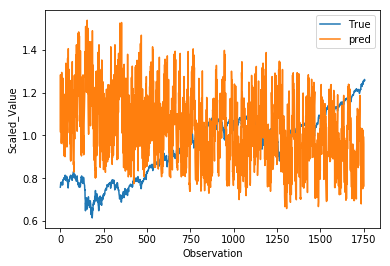

y_pred.shape: (1756,)
y_test_rsquare.shape: (1756,)
dict_keys(['loss', 'val_loss'])


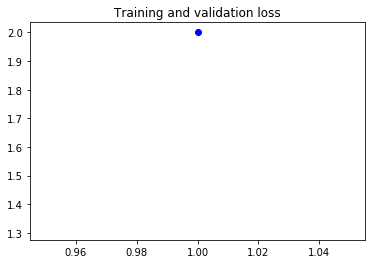

In [140]:
y_pred = predict_image(history_model=history_model,X_test=X_tst_t,input_tensor=input_tensor,
                  vex_sign=vex_sign_test,cave_sign=cave_sign_test,
                  predict_imagepath=predict_imagepath, file_name=file_name)
loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name)

In [132]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = test_date

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, np.s_[-5:])

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Close = pd.Series(yd)
Date.name = 'Date'
Close.name = 'Close'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Close.copy()
High = Close.copy()
Low = Close.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Close], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + file_name+'.csv', mode='w', header=True, index=False)

IndexError: too many indices for array

# run tcn model

In [57]:
#tcn selu
#tcn1
file_name='NYA_de5_clf_tcn1'

In [58]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor, vex_sign, cave_sign = Input(shape=(1,X_train.shape[1],)), Input(shape=(None,)), Input(shape=(None,))
vex_sign = Input(shape=(None,))
cave_sign = Input(shape=(None,))
output = TCN(nb_filters=256, kernel_size=2, nb_stacks=2, dilations=[1, 2, 4, 8, 16, 32], \
        activation='selu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.2, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.
output_tensor = Dense(1)(output)
model = Model([input_tensor,vex_sign,cave_sign], output_tensor)
model.compile(optimizer=Adam(lr=0.0001, clipnorm=1, clipvalue=0.5), \
              loss=tf_stock_loss_5(vex_sign=vex_sign,cave_sign=cave_sign))
model.summary()

history_model = model.fit(x=[X_tr_t,vex_sign_train,cave_sign_train], y=y_train, epochs=2, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio, callbacks=[CSV(losspath=losspath, file_name=file_name)],
                                    shuffle=False)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 256)       12544       input_1[0][0]                    
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 256)       131328      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation (Activation)         (None, 1, 256)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
______________________________________________________________________________________________

Epoch 1/2
6808/6808==============================] - 12s 2ms/sample - loss: 15.1506 - val_loss: 1.2841
Epoch 2/2
6808/6808==============================] - 8s 1ms/sample - loss: 2.6466 - val_loss: 0.1847


In [ ]:
plot_model_architecture(model=model, file_name=file_name)
y_pred = predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,
                  vex_sign=vex_sign_test,cave_sign=cave_sign_test,
                  predict_imagepath=predict_imagepath, file_name=file_name)
loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name)
save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,
             file_name=file_name,test_date=test_date)

In [ ]:
#tcn2
file_name='NYA_de5_clf_tcn2'

In [39]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor, vex_sign, cave_sign = Input(shape=(1,X_train.shape[1],)), Input(shape=(None,)), Input(shape=(None,))
output = TCN(nb_filters=256, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16, 32], \
        activation='selu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.2, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model([input_tensor,vex_sign,cave_sign], output_tensor)
model.compile(optimizer=Adam(lr=0.0001, clipnorm=1, clipvalue=0.5), loss=tf_stock_loss_5(vex_sign=vex_sign,cave_sign=cave_sign))
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)

history_model = model.fit(x=[X_tr_t,vex_sign_train,cave_sign_train], y=y_train, epochs=500, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio, callbacks=[CSV(losspath=losspath, file_name=file_name)],
                                    shuffle=False)





Instructions for updating:
Use tf.cast instead.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 1, 47)        0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 256)       12288       input_5[0][0]                    
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 256)       131328      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_26 (Activation)      (None, 1, 256)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
_____________________________________________________________

Instructions for updating:
Use tf.cast instead.
Epoch 1/500
6808/6808 [==============================] - 8s 1ms/sample - loss: 0.3868 - val_loss: 0.1004
Epoch 2/500
6808/6808 [==============================] - 5s 688us/sample - loss: 0.0800 - val_loss: 0.0554
Epoch 3/500
3088/6808 [============>.................] - ETA: 2s - loss: 0.0503

KeyboardInterrupt: 

In [ ]:
plot_model_architecture(model=model, file_name=file_name)
y_pred = predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,
                  vex_sign=vex_sign_test,cave_sign=cave_sign_test,
                  predict_imagepath=predict_imagepath, file_name=file_name)
loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name)
save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,
             file_name=file_name,test_date=test_date)

In [33]:
#tcn3 dilation=16
file_name='NYA_de5_clf_tcn3'
csv_logger = CSV(losspath=losspath, file_name=file_name)

In [34]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor, vex_sign, cave_sign = Input(shape=(1,X_train.shape[1],)), Input(shape=(None,)), Input(shape=(None,))
output = TCN(nb_filters=256, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16], \
        activation='relu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.2, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model([input_tensor,vex_sign,cave_sign], output_tensor)
model.compile(optimizer=Adam(lr=0.0001), loss=tf_stock_loss_5(vex_sign=vex_sign,cave_sign=cave_sign))
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history_model = model.fit(x=[X_tr_t,vex_sign_train,cave_sign_train], y=y_train, epochs=600, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio, callbacks=[CSV(losspath=losspath, file_name=file_name)],
                                    shuffle=False)




__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1, 46)        0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 256)       12032       input_1[0][0]                    
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 256)       131328      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 1, 256)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
__________________________________________________________________________________________________
tcn_spatia

6808/6808 [==============================] - 3s 431us/step - loss: 0.0043 - val_loss: 0.0518
Epoch 11/400
6808/6808 [==============================] - 3s 432us/step - loss: 0.0023 - val_loss: 0.0549
Epoch 12/400
6808/6808 [==============================] - 3s 431us/step - loss: 0.0024 - val_loss: 0.0833
Epoch 13/400
6808/6808 [==============================] - 3s 434us/step - loss: 0.0058 - val_loss: 0.0776
Epoch 14/400
6808/6808 [==============================] - 3s 432us/step - loss: 0.0019 - val_loss: 0.0840
Epoch 15/400
6808/6808 [==============================] - 3s 429us/step - loss: 0.0020 - val_loss: 0.0751
Epoch 16/400
6808/6808 [==============================] - 3s 434us/step - loss: 0.0020 - val_loss: 0.0778
Epoch 17/400
6808/6808 [==============================] - 3s 432us/step - loss: 0.0051 - val_loss: 0.0594
Epoch 18/400
6808/6808 [==============================] - 3s 433us/step - loss: 0.0023 - val_loss: 0.0541
Epoch 19/400
6808/6808 [==============================] - 3

6808/6808 [==============================] - 3s 440us/step - loss: 9.9066e-04 - val_loss: 0.0166
Epoch 160/400
6808/6808 [==============================] - 3s 441us/step - loss: 3.4262e-04 - val_loss: 0.0159
Epoch 161/400
6808/6808 [==============================] - 3s 440us/step - loss: 3.5235e-04 - val_loss: 0.0168
Epoch 162/400
6808/6808 [==============================] - 3s 438us/step - loss: 3.2774e-04 - val_loss: 0.0173
Epoch 163/400
6808/6808 [==============================] - 3s 442us/step - loss: 3.2070e-04 - val_loss: 0.0193
Epoch 164/400
6808/6808 [==============================] - 3s 442us/step - loss: 2.8154e-04 - val_loss: 0.0188
Epoch 165/400
6808/6808 [==============================] - 3s 443us/step - loss: 2.9133e-04 - val_loss: 0.0164
Epoch 166/400
6808/6808 [==============================] - 3s 439us/step - loss: 2.8782e-04 - val_loss: 0.0175
Epoch 167/400
6808/6808 [==============================] - 3s 442us/step - loss: 2.8180e-04 - val_loss: 0.0180
Epoch 168/400
6

Epoch 233/400
6808/6808 [==============================] - 3s 434us/step - loss: 2.5057e-04 - val_loss: 0.0158
Epoch 234/400
6808/6808 [==============================] - 3s 437us/step - loss: 2.5653e-04 - val_loss: 0.0131
Epoch 235/400
6808/6808 [==============================] - 3s 440us/step - loss: 2.2946e-04 - val_loss: 0.0174
Epoch 236/400
6808/6808 [==============================] - 3s 435us/step - loss: 2.2119e-04 - val_loss: 0.0188
Epoch 237/400
6808/6808 [==============================] - 3s 439us/step - loss: 2.7993e-04 - val_loss: 0.0159
Epoch 238/400
6808/6808 [==============================] - 3s 439us/step - loss: 2.2582e-04 - val_loss: 0.0162
Epoch 239/400
6808/6808 [==============================] - 3s 439us/step - loss: 2.1734e-04 - val_loss: 0.0149
Epoch 240/400
6808/6808 [==============================] - 3s 436us/step - loss: 2.1564e-04 - val_loss: 0.0146
Epoch 241/400
6808/6808 [==============================] - 3s 438us/step - loss: 2.2948e-04 - val_loss: 0.0214
E

Epoch 307/400
6808/6808 [==============================] - 3s 436us/step - loss: 2.5222e-04 - val_loss: 0.0237
Epoch 308/400
6808/6808 [==============================] - 3s 435us/step - loss: 2.5886e-04 - val_loss: 0.0228
Epoch 309/400
6808/6808 [==============================] - 3s 437us/step - loss: 2.6454e-04 - val_loss: 0.0174
Epoch 310/400
6808/6808 [==============================] - 3s 437us/step - loss: 2.5059e-04 - val_loss: 0.0180
Epoch 311/400
6808/6808 [==============================] - 3s 435us/step - loss: 2.3358e-04 - val_loss: 0.0114
Epoch 312/400
6808/6808 [==============================] - 3s 439us/step - loss: 2.6767e-04 - val_loss: 0.0064
Epoch 313/400
6808/6808 [==============================] - 3s 437us/step - loss: 3.8846e-04 - val_loss: 0.0158
Epoch 314/400
6808/6808 [==============================] - 3s 437us/step - loss: 3.2601e-04 - val_loss: 0.0185
Epoch 315/400
6808/6808 [==============================] - 3s 439us/step - loss: 2.7127e-04 - val_loss: 0.0181
E

In [ ]:
plot_model_architecture(model=model, file_name=file_name)
y_pred = predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,
                  vex_sign=vex_sign_test,cave_sign=cave_sign_test,
                  predict_imagepath=predict_imagepath, file_name=file_name)
loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name)
save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,
             file_name=file_name,test_date=test_date)

In [38]:
#tcn4
file_name='NYA_de5_clf_tcn4'
csv_logger = CSV(losspath=losspath, file_name=file_name)

In [39]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor, vex_sign, cave_sign = Input(shape=(1,X_train.shape[1],)), Input(shape=(None,)), Input(shape=(None,))
output = TCN(nb_filters=256, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16], \
        activation='relu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.3, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model([input_tensor,vex_sign,cave_sign], output_tensor)
model.compile(optimizer=Adam(lr=0.0001), loss=tf_stock_loss_5(vex_sign=vex_sign,cave_sign=cave_sign))
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history_model = model.fit(x=[X_tr_t,vex_sign_train,cave_sign_train], y=y_train, epochs=600, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio, callbacks=[CSV(losspath=losspath, file_name=file_name)],
                                    shuffle=False)




__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 1, 46)        0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 256)       12032       input_2[0][0]                    
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 256)       131328      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_7 (Activation)       (None, 1, 256)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
__________________________________________________________________________________________________
tcn_spatia

6808/6808 [==============================] - 3s 439us/step - loss: 0.0032 - val_loss: 0.0800
Epoch 11/400
6808/6808 [==============================] - 3s 439us/step - loss: 0.0047 - val_loss: 0.0960
Epoch 12/400
6808/6808 [==============================] - 3s 439us/step - loss: 0.0046 - val_loss: 0.0597
Epoch 13/400
6808/6808 [==============================] - 3s 442us/step - loss: 0.0030 - val_loss: 0.0790
Epoch 14/400
6808/6808 [==============================] - 3s 437us/step - loss: 0.0041 - val_loss: 0.0512
Epoch 15/400
6808/6808 [==============================] - 3s 439us/step - loss: 0.0018 - val_loss: 0.0487
Epoch 16/400
6808/6808 [==============================] - 3s 439us/step - loss: 0.0025 - val_loss: 0.0838
Epoch 17/400
6808/6808 [==============================] - 3s 437us/step - loss: 0.0037 - val_loss: 0.0490
Epoch 18/400
6808/6808 [==============================] - 3s 442us/step - loss: 0.0015 - val_loss: 0.0594
Epoch 19/400
6808/6808 [==============================] - E

6808/6808 [==============================] - 3s 443us/step - loss: 2.4999e-04 - val_loss: 0.0214
Epoch 160/400
6808/6808 [==============================] - 3s 447us/step - loss: 2.8897e-04 - val_loss: 0.0215
Epoch 161/400
6808/6808 [==============================] - 3s 444us/step - loss: 2.7801e-04 - val_loss: 0.0276
Epoch 162/400
6808/6808 [==============================] - 3s 441us/step - loss: 3.0524e-04 - val_loss: 0.0255
Epoch 163/400
6808/6808 [==============================] - 3s 444us/step - loss: 2.7148e-04 - val_loss: 0.0210
Epoch 164/400
6808/6808 [==============================] - 3s 442us/step - loss: 2.8617e-04 - val_loss: 0.0223
Epoch 165/400
6808/6808 [==============================] - 3s 445us/step - loss: 8.0080e-04 - val_loss: 0.0156
Epoch 166/400
6808/6808 [==============================] - 3s 442us/step - loss: 9.6148e-04 - val_loss: 0.0572
Epoch 167/400
6808/6808 [==============================] - 3s 444us/step - loss: 0.0020 - val_loss: 0.0641
Epoch 168/400
6808/

Epoch 307/400
6808/6808 [==============================] - 3s 446us/step - loss: 1.9803e-04 - val_loss: 0.0185
Epoch 308/400
6808/6808 [==============================] - 3s 444us/step - loss: 2.2713e-04 - val_loss: 0.0102
Epoch 309/400
6808/6808 [==============================] - 3s 444us/step - loss: 2.4362e-04 - val_loss: 0.0146
Epoch 310/400
6808/6808 [==============================] - 3s 443us/step - loss: 2.6768e-04 - val_loss: 0.0239
Epoch 311/400
6808/6808 [==============================] - 3s 446us/step - loss: 2.8286e-04 - val_loss: 0.0139
Epoch 312/400
6808/6808 [==============================] - 3s 445us/step - loss: 2.3004e-04 - val_loss: 0.0187
Epoch 313/400
6808/6808 [==============================] - 3s 447us/step - loss: 2.0841e-04 - val_loss: 0.0171
Epoch 314/400
6808/6808 [==============================] - 3s 444us/step - loss: 2.4803e-04 - val_loss: 0.0110
Epoch 315/400
6808/6808 [==============================] - 3s 444us/step - loss: 2.2692e-04 - val_loss: 0.0194
E

Epoch 381/400
6808/6808 [==============================] - 3s 466us/step - loss: 2.1261e-04 - val_loss: 0.0198
Epoch 382/400
6808/6808 [==============================] - 3s 466us/step - loss: 2.0578e-04 - val_loss: 0.0187
Epoch 383/400
6808/6808 [==============================] - 3s 469us/step - loss: 2.1425e-04 - val_loss: 0.0203
Epoch 384/400
6808/6808 [==============================] - 3s 471us/step - loss: 2.1373e-04 - val_loss: 0.0181
Epoch 385/400
6808/6808 [==============================] - 3s 471us/step - loss: 2.7023e-04 - val_loss: 0.0169
Epoch 386/400
6808/6808 [==============================] - 3s 465us/step - loss: 4.7712e-04 - val_loss: 0.0203
Epoch 387/400
6808/6808 [==============================] - 3s 466us/step - loss: 2.7558e-04 - val_loss: 0.0178
Epoch 388/400
6808/6808 [==============================] - 3s 474us/step - loss: 2.4184e-04 - val_loss: 0.0175
Epoch 389/400
6808/6808 [==============================] - 3s 467us/step - loss: 2.1775e-04 - val_loss: 0.0212
E

In [ ]:
plot_model_architecture(model=model, file_name=file_name)
y_pred = predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,
                  vex_sign=vex_sign_test,cave_sign=cave_sign_test,
                  predict_imagepath=predict_imagepath, file_name=file_name)
loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name)
save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,
             file_name=file_name,test_date=test_date)

In [43]:
#tcn5
file_name='NYA_de5_clf_tcn5'
csv_logger = CSV(losspath=losspath, file_name=file_name)

In [63]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor, vex_sign, cave_sign = Input(shape=(1,X_train.shape[1],)), Input(shape=(None,)), Input(shape=(None,))
output = TCN(nb_filters=256, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16], \
        activation='relu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.4, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model([input_tensor,vex_sign,cave_sign], output_tensor)
model.compile(optimizer=Adam(lr=0.00001, clipnorm=1, clipvalue=0.5), loss=tf_stock_loss_5(vex_sign=vex_sign,cave_sign=cave_sign))
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history_model = model.fit(x=[X_tr_t,vex_sign_train,cave_sign_train], y=y_train, epochs=600, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio, callbacks=[CSV(losspath=losspath, file_name=file_name)],
                                    shuffle=False)




__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 1, 46)        0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 256)       12032       input_7[0][0]                    
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 256)       131328      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_40 (Activation)      (None, 1, 256)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
__________________________________________________________________________________________________
tcn_spatia

6808/6808 [==============================] - 3s 511us/step - loss: 0.0043 - val_loss: 0.0038
Epoch 11/600
6808/6808 [==============================] - 3s 507us/step - loss: 0.0033 - val_loss: 0.0029
Epoch 12/600
6808/6808 [==============================] - 3s 510us/step - loss: 0.0029 - val_loss: 0.0029
Epoch 13/600
6808/6808 [==============================] - 3s 508us/step - loss: 0.0024 - val_loss: 0.0030
Epoch 14/600
6808/6808 [==============================] - 3s 507us/step - loss: 0.0022 - val_loss: 0.0027
Epoch 15/600
6808/6808 [==============================] - 3s 511us/step - loss: 0.0021 - val_loss: 0.0020
Epoch 16/600
6808/6808 [==============================] - 3s 508us/step - loss: 0.0019 - val_loss: 0.0020
Epoch 17/600
6808/6808 [==============================] - 3s 507us/step - loss: 0.0016 - val_loss: 0.0029
Epoch 18/600
6808/6808 [==============================] - 4s 515us/step - loss: 0.0015 - val_loss: 0.0021
Epoch 19/600
6808/6808 [==============================] - 3

Epoch 159/600
6808/6808 [==============================] - 3s 508us/step - loss: 1.9759e-04 - val_loss: 0.0054
Epoch 160/600
6808/6808 [==============================] - 3s 505us/step - loss: 2.0690e-04 - val_loss: 0.0055
Epoch 161/600
6808/6808 [==============================] - 3s 506us/step - loss: 2.0390e-04 - val_loss: 0.0059
Epoch 162/600
6808/6808 [==============================] - 3s 505us/step - loss: 2.0186e-04 - val_loss: 0.0061
Epoch 163/600
6808/6808 [==============================] - 3s 507us/step - loss: 2.0422e-04 - val_loss: 0.0084
Epoch 164/600
6808/6808 [==============================] - 3s 504us/step - loss: 2.0424e-04 - val_loss: 0.0068
Epoch 165/600
6808/6808 [==============================] - 3s 506us/step - loss: 1.9561e-04 - val_loss: 0.0081
Epoch 166/600
6808/6808 [==============================] - 3s 506us/step - loss: 2.0084e-04 - val_loss: 0.0063
Epoch 167/600
6808/6808 [==============================] - 3s 502us/step - loss: 2.0058e-04 - val_loss: 0.0063
E

Epoch 233/600
6808/6808 [==============================] - 3s 505us/step - loss: 1.6471e-04 - val_loss: 0.0078
Epoch 234/600
6808/6808 [==============================] - 3s 506us/step - loss: 1.6116e-04 - val_loss: 0.0095
Epoch 235/600
6808/6808 [==============================] - 3s 504us/step - loss: 1.6167e-04 - val_loss: 0.0078
Epoch 236/600
6808/6808 [==============================] - 3s 502us/step - loss: 1.6088e-04 - val_loss: 0.0075
Epoch 237/600
6808/6808 [==============================] - 3s 506us/step - loss: 1.6455e-04 - val_loss: 0.0072
Epoch 238/600
6808/6808 [==============================] - 3s 505us/step - loss: 1.5642e-04 - val_loss: 0.0084
Epoch 239/600
6808/6808 [==============================] - 3s 502us/step - loss: 1.6015e-04 - val_loss: 0.0075
Epoch 240/600
6808/6808 [==============================] - 3s 504us/step - loss: 1.5844e-04 - val_loss: 0.0075
Epoch 241/600
6808/6808 [==============================] - 3s 505us/step - loss: 1.5795e-04 - val_loss: 0.0093
E

Epoch 307/600
6808/6808 [==============================] - 3s 502us/step - loss: 1.2944e-04 - val_loss: 0.0089
Epoch 308/600
6808/6808 [==============================] - 3s 505us/step - loss: 1.3123e-04 - val_loss: 0.0089
Epoch 309/600
6808/6808 [==============================] - 3s 506us/step - loss: 1.2628e-04 - val_loss: 0.0079
Epoch 310/600
6808/6808 [==============================] - 3s 502us/step - loss: 1.3052e-04 - val_loss: 0.0090
Epoch 311/600
6808/6808 [==============================] - 3s 505us/step - loss: 1.2693e-04 - val_loss: 0.0093
Epoch 312/600
6808/6808 [==============================] - 3s 503us/step - loss: 1.3635e-04 - val_loss: 0.0093
Epoch 313/600
6808/6808 [==============================] - 3s 504us/step - loss: 1.3516e-04 - val_loss: 0.0103
Epoch 314/600
6808/6808 [==============================] - 3s 504us/step - loss: 1.3085e-04 - val_loss: 0.0093
Epoch 315/600
6808/6808 [==============================] - 3s 506us/step - loss: 1.4050e-04 - val_loss: 0.0089
E

Epoch 381/600
6808/6808 [==============================] - 3s 502us/step - loss: 1.1006e-04 - val_loss: 0.0113
Epoch 382/600
6808/6808 [==============================] - 3s 503us/step - loss: 1.1295e-04 - val_loss: 0.0091
Epoch 383/600
6808/6808 [==============================] - 3s 503us/step - loss: 1.1215e-04 - val_loss: 0.0107
Epoch 384/600
6808/6808 [==============================] - 3s 501us/step - loss: 1.1459e-04 - val_loss: 0.0101
Epoch 385/600
6808/6808 [==============================] - 3s 502us/step - loss: 1.1267e-04 - val_loss: 0.0110
Epoch 386/600
6808/6808 [==============================] - 3s 503us/step - loss: 1.1276e-04 - val_loss: 0.0114
Epoch 387/600
6808/6808 [==============================] - 3s 503us/step - loss: 1.1026e-04 - val_loss: 0.0106
Epoch 388/600
6808/6808 [==============================] - 3s 503us/step - loss: 1.1420e-04 - val_loss: 0.0106
Epoch 389/600
6808/6808 [==============================] - 3s 501us/step - loss: 1.1515e-04 - val_loss: 0.0108
E

Epoch 455/600
6808/6808 [==============================] - 3s 503us/step - loss: 9.5927e-05 - val_loss: 0.0117
Epoch 456/600
6808/6808 [==============================] - 3s 503us/step - loss: 1.0042e-04 - val_loss: 0.0110
Epoch 457/600
6808/6808 [==============================] - 3s 505us/step - loss: 1.0009e-04 - val_loss: 0.0107
Epoch 458/600
6808/6808 [==============================] - 3s 504us/step - loss: 9.8993e-05 - val_loss: 0.0124
Epoch 459/600
6808/6808 [==============================] - 3s 502us/step - loss: 1.0033e-04 - val_loss: 0.0095
Epoch 460/600
6808/6808 [==============================] - 3s 505us/step - loss: 1.0273e-04 - val_loss: 0.0113
Epoch 461/600
6808/6808 [==============================] - 3s 503us/step - loss: 1.0036e-04 - val_loss: 0.0103
Epoch 462/600
6808/6808 [==============================] - 3s 502us/step - loss: 1.0390e-04 - val_loss: 0.0099
Epoch 463/600
6808/6808 [==============================] - 3s 505us/step - loss: 1.1061e-04 - val_loss: 0.0115
E

In [ ]:
plot_model_architecture(model=model, file_name=file_name)
y_pred = predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,
                  vex_sign=vex_sign_test,cave_sign=cave_sign_test,
                  predict_imagepath=predict_imagepath, file_name=file_name)
loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name)
save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,
             file_name=file_name,test_date=test_date)

In [97]:
#tcn6 tcn6~8 dila=32 dr=0.2~0.4
file_name='NYA_de5_clf_tcn6'
csv_logger = CSV(losspath=losspath, file_name=file_name)

In [98]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor, vex_sign, cave_sign = Input(shape=(1,X_train.shape[1],)), Input(shape=(None,)), Input(shape=(None,))
output = TCN(nb_filters=256, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16, 32], \
        activation='relu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.2, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model([input_tensor,vex_sign,cave_sign], output_tensor)
model.compile(optimizer=Adam(lr=0.00001, clipnorm=1, clipvalue=0.5), loss=tf_stock_loss_5(vex_sign=vex_sign,cave_sign=cave_sign))
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history_model = model.fit(x=[X_tr_t,vex_sign_train,cave_sign_train], y=y_train, epochs=600, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio, callbacks=[CSV(losspath=losspath, file_name=file_name)],
                                    shuffle=False)




Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 256)       12544       input_9[0][0]                    
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 256)       131328      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_28 (Activation)      (None, 1, 256)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
____________________________________________________________________________________________

Epoch 1/600
6808/6808==============================] - 7s 1ms/sample - loss: 0.6936 - val_loss: 0.2778
Epoch 2/600
6808/6808==============================] - 5s 732us/sample - loss: 0.2795 - val_loss: 0.4388
Epoch 3/600
6808/6808==============================] - 5s 731us/sample - loss: 0.1542 - val_loss: 0.2986
Epoch 4/600
6808/6808==============================] - 5s 723us/sample - loss: 0.0914 - val_loss: 0.1998
Epoch 5/600
6808/6808==============================] - 5s 729us/sample - loss: 0.0625 - val_loss: 0.1099
Epoch 6/600
6808/6808==============================] - 5s 726us/sample - loss: 0.0480 - val_loss: 0.0595
Epoch 7/600
6808/6808==============================] - 5s 729us/sample - loss: 0.0373 - val_loss: 0.0365
Epoch 8/600
6808/6808==============================] - 5s 725us/sample - loss: 0.0310 - val_loss: 0.0321
Epoch 9/600
6808/6808==============================] - 5s 727us/sample - loss: 0.0256 - val_loss: 0.0313
Epoch 10/600
6808/6808==============================] - 5

6808/6808==============================] - 5s 709us/sample - loss: 5.9556e-04 - val_loss: 0.0215
Epoch 153/600
6808/6808==============================] - 5s 711us/sample - loss: 6.2658e-04 - val_loss: 0.0264
Epoch 154/600
6808/6808==============================] - 5s 711us/sample - loss: 6.3191e-04 - val_loss: 0.0231
Epoch 155/600
6808/6808==============================] - 5s 715us/sample - loss: 6.0450e-04 - val_loss: 0.0189
Epoch 156/600
6808/6808==============================] - 5s 717us/sample - loss: 5.7031e-04 - val_loss: 0.0281
Epoch 157/600
6808/6808==============================] - 5s 719us/sample - loss: 5.5910e-04 - val_loss: 0.0255
Epoch 158/600
6808/6808==============================] - 5s 714us/sample - loss: 5.7263e-04 - val_loss: 0.0198
Epoch 159/600
6808/6808==============================] - 5s 713us/sample - loss: 5.6571e-04 - val_loss: 0.0221
Epoch 160/600
6808/6808==============================] - 5s 716us/sample - loss: 5.7913e-04 - val_loss: 0.0239
Epoch 161/600
6

Epoch 226/600
6808/6808==============================] - 5s 714us/sample - loss: 5.3429e-04 - val_loss: 0.0259
Epoch 227/600
6808/6808==============================] - 5s 709us/sample - loss: 4.8885e-04 - val_loss: 0.0287
Epoch 228/600
6808/6808==============================] - 5s 709us/sample - loss: 4.8882e-04 - val_loss: 0.0367
Epoch 229/600
6808/6808==============================] - 5s 704us/sample - loss: 5.0175e-04 - val_loss: 0.0278
Epoch 230/600
6808/6808==============================] - 5s 713us/sample - loss: 5.7948e-04 - val_loss: 0.0255
Epoch 231/600
6808/6808==============================] - 5s 709us/sample - loss: 5.1725e-04 - val_loss: 0.0209
Epoch 232/600
6808/6808==============================] - 5s 706us/sample - loss: 4.6719e-04 - val_loss: 0.0280
Epoch 233/600
6808/6808==============================] - 5s 714us/sample - loss: 5.0511e-04 - val_loss: 0.0264
Epoch 234/600
6808/6808==============================] - 5s 719us/sample - loss: 5.1558e-04 - val_loss: 0.0289
E

Epoch 300/600
6808/6808==============================] - 5s 711us/sample - loss: 3.8315e-04 - val_loss: 0.0188
Epoch 301/600
6808/6808==============================] - 5s 711us/sample - loss: 4.0921e-04 - val_loss: 0.0231
Epoch 302/600
6808/6808==============================] - 5s 709us/sample - loss: 4.0688e-04 - val_loss: 0.0229
Epoch 303/600
6808/6808==============================] - 5s 714us/sample - loss: 4.8036e-04 - val_loss: 0.0305
Epoch 304/600
6808/6808==============================] - 5s 709us/sample - loss: 4.1915e-04 - val_loss: 0.0206
Epoch 305/600
6808/6808==============================] - 5s 704us/sample - loss: 4.7999e-04 - val_loss: 0.0259
Epoch 306/600
6808/6808==============================] - 5s 709us/sample - loss: 4.0769e-04 - val_loss: 0.0223
Epoch 307/600
6808/6808==============================] - 5s 709us/sample - loss: 3.6707e-04 - val_loss: 0.0215
Epoch 308/600
6808/6808==============================] - 5s 704us/sample - loss: 3.8043e-04 - val_loss: 0.0245
E

6808/6808==============================] - 5s 706us/sample - loss: 2.8406e-04 - val_loss: 0.0295
Epoch 447/600
6808/6808==============================] - 5s 714us/sample - loss: 3.0406e-04 - val_loss: 0.0470
Epoch 448/600
6808/6808==============================] - 5s 711us/sample - loss: 3.0034e-04 - val_loss: 0.0347
Epoch 449/600
6808/6808==============================] - 5s 711us/sample - loss: 3.1202e-04 - val_loss: 0.0285
Epoch 450/600
6808/6808==============================] - 5s 706us/sample - loss: 2.8003e-04 - val_loss: 0.0447
Epoch 451/600
6808/6808==============================] - 5s 721us/sample - loss: 2.9933e-04 - val_loss: 0.0251
Epoch 452/600
6808/6808==============================] - 5s 712us/sample - loss: 3.1382e-04 - val_loss: 0.0387
Epoch 453/600
6808/6808==============================] - 5s 706us/sample - loss: 3.0855e-04 - val_loss: 0.0317
Epoch 454/600
6808/6808==============================] - 5s 719us/sample - loss: 3.1339e-04 - val_loss: 0.0254
Epoch 455/600
6

Epoch 593/600
6808/6808==============================] - 5s 716us/sample - loss: 2.7833e-04 - val_loss: 0.0299
Epoch 594/600
6808/6808==============================] - 5s 714us/sample - loss: 3.3932e-04 - val_loss: 0.0438
Epoch 595/600
6808/6808==============================] - 5s 714us/sample - loss: 3.6488e-04 - val_loss: 0.0396
Epoch 596/600
6808/6808==============================] - 5s 708us/sample - loss: 2.8395e-04 - val_loss: 0.0344
Epoch 597/600
6808/6808==============================] - 5s 710us/sample - loss: 2.8061e-04 - val_loss: 0.0352
Epoch 598/600
6808/6808==============================] - 5s 710us/sample - loss: 3.2400e-04 - val_loss: 0.0331
Epoch 599/600
6808/6808==============================] - 5s 715us/sample - loss: 4.0045e-04 - val_loss: 0.0341
Epoch 600/600
6808/6808==============================] - 5s 714us/sample - loss: 3.4550e-04 - val_loss: 0.0349


y_pred.shape: (1756, 1)
y_test_rsquare.shape: (1756,)
R-Squared: 0.652864
The Adjusted R2 score on the Test set is:	0.643


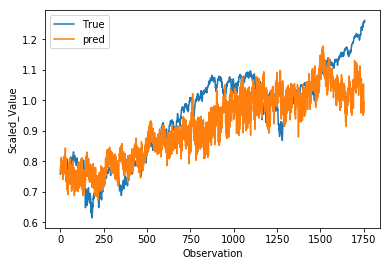

dict_keys(['loss', 'val_loss'])


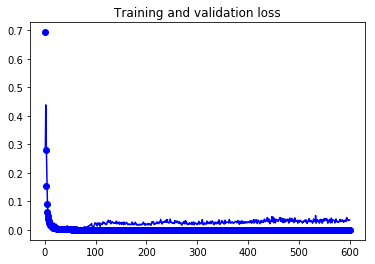

In [99]:
plot_model_architecture(model=model, file_name=file_name)
y_pred = predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,
                  vex_sign=vex_sign_test,cave_sign=cave_sign_test,
                  predict_imagepath=predict_imagepath, file_name=file_name)
loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name)
save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,
             file_name=file_name,test_date=test_date)

In [100]:
#tcn7 tcn6~8 dila=32 dr=0.2~0.4
file_name='NYA_de5_clf_tcn7'
csv_logger = CSV(losspath=losspath, file_name=file_name)

In [101]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor, vex_sign, cave_sign = Input(shape=(1,X_train.shape[1],)), Input(shape=(None,)), Input(shape=(None,))
output = TCN(nb_filters=256, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16, 32], \
        activation='relu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.3, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model([input_tensor,vex_sign,cave_sign], output_tensor)
model.compile(optimizer=Adam(lr=0.00001, clipnorm=1, clipvalue=0.5), loss=tf_stock_loss_5(vex_sign=vex_sign,cave_sign=cave_sign))
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history_model = model.fit(x=[X_tr_t,vex_sign_train,cave_sign_train], y=y_train, epochs=600, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio, callbacks=[CSV(losspath=losspath, file_name=file_name)],
                                    shuffle=False)




Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 256)       12544       input_12[0][0]                   
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 256)       131328      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_35 (Activation)      (None, 1, 256)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
____________________________________________________________________________________________

Epoch 1/600
6808/6808==============================] - 7s 1ms/sample - loss: 0.9371 - val_loss: 0.4149
Epoch 2/600
6808/6808==============================] - 5s 735us/sample - loss: 0.3526 - val_loss: 0.1515
Epoch 3/600
6808/6808==============================] - 5s 735us/sample - loss: 0.1834 - val_loss: 0.2802
Epoch 4/600
6808/6808==============================] - 5s 738us/sample - loss: 0.1194 - val_loss: 0.0585
Epoch 5/600
6808/6808==============================] - 5s 739us/sample - loss: 0.0780 - val_loss: 0.0988
Epoch 6/600
6808/6808==============================] - 5s 734us/sample - loss: 0.0534 - val_loss: 0.0948
Epoch 7/600
6808/6808==============================] - 5s 734us/sample - loss: 0.0432 - val_loss: 0.0778
Epoch 8/600
6808/6808==============================] - 5s 746us/sample - loss: 0.0319 - val_loss: 0.0636
Epoch 9/600
6808/6808==============================] - 5s 759us/sample - loss: 0.0263 - val_loss: 0.0472
Epoch 10/600
6808/6808==============================] - 5

6808/6808==============================] - 5s 723us/sample - loss: 6.2889e-04 - val_loss: 0.0369
Epoch 153/600
6808/6808==============================] - 5s 716us/sample - loss: 6.4138e-04 - val_loss: 0.0332
Epoch 154/600
6808/6808==============================] - 5s 719us/sample - loss: 6.3344e-04 - val_loss: 0.0375
Epoch 155/600
6808/6808==============================] - 5s 714us/sample - loss: 6.3431e-04 - val_loss: 0.0370
Epoch 156/600
6808/6808==============================] - 5s 716us/sample - loss: 6.5785e-04 - val_loss: 0.0394
Epoch 157/600
6808/6808==============================] - 5s 716us/sample - loss: 6.4399e-04 - val_loss: 0.0437
Epoch 158/600
6808/6808==============================] - 5s 712us/sample - loss: 6.9236e-04 - val_loss: 0.0341
Epoch 159/600
6808/6808==============================] - 5s 718us/sample - loss: 6.9545e-04 - val_loss: 0.0407
Epoch 160/600
6808/6808==============================] - 5s 719us/sample - loss: 6.7742e-04 - val_loss: 0.0367
Epoch 161/600
6

Epoch 299/600
6808/6808==============================] - 5s 716us/sample - loss: 4.9629e-04 - val_loss: 0.0557
Epoch 300/600
6808/6808==============================] - 5s 716us/sample - loss: 4.8257e-04 - val_loss: 0.0423
Epoch 301/600
6808/6808==============================] - 5s 719us/sample - loss: 4.7469e-04 - val_loss: 0.0518
Epoch 302/600
6808/6808==============================] - 5s 714us/sample - loss: 4.3530e-04 - val_loss: 0.0554
Epoch 303/600
6808/6808==============================] - 5s 716us/sample - loss: 4.5075e-04 - val_loss: 0.0376
Epoch 304/600
6808/6808==============================] - 5s 719us/sample - loss: 4.4098e-04 - val_loss: 0.0541
Epoch 305/600
6808/6808==============================] - 5s 716us/sample - loss: 5.2800e-04 - val_loss: 0.0581
Epoch 306/600
6808/6808==============================] - 5s 719us/sample - loss: 4.7276e-04 - val_loss: 0.0569
Epoch 307/600
6808/6808==============================] - 5s 711us/sample - loss: 4.7834e-04 - val_loss: 0.0498
E

Epoch 373/600
6808/6808==============================] - 5s 721us/sample - loss: 4.4619e-04 - val_loss: 0.0467
Epoch 374/600
6808/6808==============================] - 5s 715us/sample - loss: 4.1458e-04 - val_loss: 0.0354
Epoch 375/600
6808/6808==============================] - 5s 718us/sample - loss: 4.3616e-04 - val_loss: 0.0360
Epoch 376/600
6808/6808==============================] - 5s 717us/sample - loss: 3.6422e-04 - val_loss: 0.0290
Epoch 377/600
6808/6808==============================] - 5s 719us/sample - loss: 3.9923e-04 - val_loss: 0.0352
Epoch 378/600
6808/6808==============================] - 5s 718us/sample - loss: 3.6798e-04 - val_loss: 0.0311
Epoch 379/600
6808/6808==============================] - 5s 721us/sample - loss: 4.1084e-04 - val_loss: 0.0408
Epoch 380/600
6808/6808==============================] - 5s 714us/sample - loss: 3.7055e-04 - val_loss: 0.0363
Epoch 381/600
6808/6808==============================] - 5s 714us/sample - loss: 4.0389e-04 - val_loss: 0.0403
E

Epoch 447/600
6808/6808==============================] - 5s 717us/sample - loss: 3.6365e-04 - val_loss: 0.0388
Epoch 448/600
6808/6808==============================] - 5s 718us/sample - loss: 3.4685e-04 - val_loss: 0.0449
Epoch 449/600
6808/6808==============================] - 5s 713us/sample - loss: 3.3890e-04 - val_loss: 0.0474
Epoch 450/600
6808/6808==============================] - 5s 717us/sample - loss: 3.2802e-04 - val_loss: 0.0480
Epoch 451/600
6808/6808==============================] - 5s 718us/sample - loss: 3.2218e-04 - val_loss: 0.0454
Epoch 452/600
6808/6808==============================] - 5s 713us/sample - loss: 3.6572e-04 - val_loss: 0.0491
Epoch 453/600
6808/6808==============================] - 5s 719us/sample - loss: 3.5073e-04 - val_loss: 0.0490
Epoch 454/600
6808/6808==============================] - 5s 719us/sample - loss: 3.3449e-04 - val_loss: 0.0487
Epoch 455/600
6808/6808==============================] - 5s 714us/sample - loss: 3.6947e-04 - val_loss: 0.0560
E

Epoch 521/600
6808/6808==============================] - 5s 721us/sample - loss: 3.0642e-04 - val_loss: 0.0517
Epoch 522/600
6808/6808==============================] - 5s 716us/sample - loss: 3.1437e-04 - val_loss: 0.0517
Epoch 523/600
6808/6808==============================] - 5s 717us/sample - loss: 3.2057e-04 - val_loss: 0.0524
Epoch 524/600
6808/6808==============================] - 5s 719us/sample - loss: 3.2167e-04 - val_loss: 0.0517
Epoch 525/600
6808/6808==============================] - 5s 711us/sample - loss: 3.2213e-04 - val_loss: 0.0573
Epoch 526/600
6808/6808==============================] - 5s 719us/sample - loss: 3.3204e-04 - val_loss: 0.0621
Epoch 527/600
6808/6808==============================] - 5s 725us/sample - loss: 3.0331e-04 - val_loss: 0.0583
Epoch 528/600
6808/6808==============================] - 5s 720us/sample - loss: 3.0864e-04 - val_loss: 0.0545
Epoch 529/600
6808/6808==============================] - 5s 714us/sample - loss: 3.3272e-04 - val_loss: 0.0516
E

Epoch 595/600
6808/6808==============================] - 5s 749us/sample - loss: 2.9631e-04 - val_loss: 0.0474
Epoch 596/600
6808/6808==============================] - 5s 771us/sample - loss: 3.0303e-04 - val_loss: 0.0440
Epoch 597/600
6808/6808==============================] - 5s 751us/sample - loss: 2.9292e-04 - val_loss: 0.0419
Epoch 598/600
6808/6808==============================] - 5s 735us/sample - loss: 3.3324e-04 - val_loss: 0.0512
Epoch 599/600
6808/6808==============================] - 5s 734us/sample - loss: 3.1354e-04 - val_loss: 0.0616
Epoch 600/600
6808/6808==============================] - 5s 728us/sample - loss: 3.5965e-04 - val_loss: 0.0421


y_pred.shape: (1756, 1)
y_test_rsquare.shape: (1756,)
R-Squared: 0.388380
The Adjusted R2 score on the Test set is:	0.371


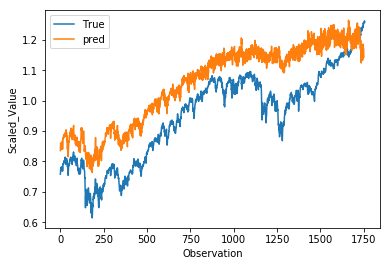

dict_keys(['loss', 'val_loss'])


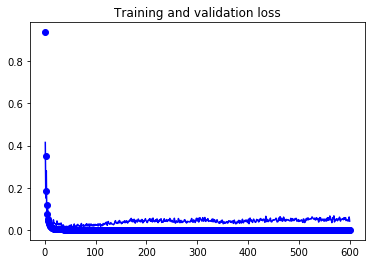

In [102]:
plot_model_architecture(model=model, file_name=file_name)
y_pred = predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,
                  vex_sign=vex_sign_test,cave_sign=cave_sign_test,
                  predict_imagepath=predict_imagepath, file_name=file_name)
loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name)
save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,
             file_name=file_name,test_date=test_date)

In [103]:
#tcn8 tcn6~8 dila=32 dr=0.2~0.4
file_name='NYA_de5_clf_tcn8'
csv_logger = CSV(losspath=losspath, file_name=file_name)

In [104]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor, vex_sign, cave_sign = Input(shape=(1,X_train.shape[1],)), Input(shape=(None,)), Input(shape=(None,))
output = TCN(nb_filters=256, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16, 32], \
        activation='relu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.4, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model([input_tensor,vex_sign,cave_sign], output_tensor)
model.compile(optimizer=Adam(lr=0.00001, clipnorm=1, clipvalue=0.5), loss=tf_stock_loss_5(vex_sign=vex_sign,cave_sign=cave_sign))
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history_model = model.fit(x=[X_tr_t,vex_sign_train,cave_sign_train], y=y_train, epochs=600, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio, callbacks=[CSV(losspath=losspath, file_name=file_name)],
                                    shuffle=False)




Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 256)       12544       input_15[0][0]                   
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 256)       131328      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_42 (Activation)      (None, 1, 256)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
____________________________________________________________________________________________

Epoch 1/600
6808/6808==============================] - 7s 1ms/sample - loss: 1.3014 - val_loss: 0.3537
Epoch 2/600
6808/6808==============================] - 5s 749us/sample - loss: 0.5262 - val_loss: 0.4808
Epoch 3/600
6808/6808==============================] - 5s 761us/sample - loss: 0.2793 - val_loss: 0.3858
Epoch 4/600
6808/6808==============================] - 5s 762us/sample - loss: 0.1769 - val_loss: 0.2064
Epoch 5/600
6808/6808==============================] - 5s 753us/sample - loss: 0.1167 - val_loss: 0.2852
Epoch 6/600
6808/6808==============================] - 5s 740us/sample - loss: 0.0779 - val_loss: 0.1051
Epoch 7/600
6808/6808==============================] - 5s 753us/sample - loss: 0.0556 - val_loss: 0.1776
Epoch 8/600
6808/6808==============================] - 5s 782us/sample - loss: 0.0418 - val_loss: 0.0837
Epoch 9/600
6808/6808==============================] - 5s 780us/sample - loss: 0.0320 - val_loss: 0.0891
Epoch 10/600
6808/6808==============================] - 5

Epoch 153/600
6808/6808==============================] - 5s 728us/sample - loss: 7.4512e-04 - val_loss: 0.0097
Epoch 154/600
6808/6808==============================] - 5s 725us/sample - loss: 7.4254e-04 - val_loss: 0.0072
Epoch 155/600
6808/6808==============================] - 5s 728us/sample - loss: 7.0224e-04 - val_loss: 0.0096
Epoch 156/600
6808/6808==============================] - 5s 725us/sample - loss: 7.3605e-04 - val_loss: 0.0096
Epoch 157/600
6808/6808==============================] - 5s 719us/sample - loss: 6.7189e-04 - val_loss: 0.0114
Epoch 158/600
6808/6808==============================] - 5s 720us/sample - loss: 7.0039e-04 - val_loss: 0.0095
Epoch 159/600
6808/6808==============================] - 5s 727us/sample - loss: 6.9937e-04 - val_loss: 0.0070
Epoch 160/600
6808/6808==============================] - 5s 725us/sample - loss: 6.9634e-04 - val_loss: 0.0072
Epoch 161/600
6808/6808==============================] - 5s 724us/sample - loss: 7.0106e-04 - val_loss: 0.0121
E

Epoch 227/600
6808/6808==============================] - 5s 724us/sample - loss: 5.9571e-04 - val_loss: 0.0124
Epoch 228/600
6808/6808==============================] - 5s 724us/sample - loss: 5.9087e-04 - val_loss: 0.0120
Epoch 229/600
6808/6808==============================] - 5s 728us/sample - loss: 5.5480e-04 - val_loss: 0.0131
Epoch 230/600
6808/6808==============================] - 5s 723us/sample - loss: 5.9652e-04 - val_loss: 0.0106
Epoch 231/600
6808/6808==============================] - 5s 728us/sample - loss: 5.5140e-04 - val_loss: 0.0102
Epoch 232/600
6808/6808==============================] - 5s 725us/sample - loss: 5.6170e-04 - val_loss: 0.0098
Epoch 233/600
6808/6808==============================] - 5s 727us/sample - loss: 5.4766e-04 - val_loss: 0.0116
Epoch 234/600
6808/6808==============================] - 5s 734us/sample - loss: 5.4853e-04 - val_loss: 0.0116
Epoch 235/600
6808/6808==============================] - 5s 754us/sample - loss: 5.1776e-04 - val_loss: 0.0115
E

Epoch 301/600
6808/6808==============================] - 5s 727us/sample - loss: 4.9435e-04 - val_loss: 0.0160
Epoch 302/600
6808/6808==============================] - 5s 729us/sample - loss: 5.2754e-04 - val_loss: 0.0158
Epoch 303/600
6808/6808==============================] - 5s 735us/sample - loss: 4.4036e-04 - val_loss: 0.0139
Epoch 304/600
6808/6808==============================] - 5s 726us/sample - loss: 4.4527e-04 - val_loss: 0.0133
Epoch 305/600
6808/6808==============================] - 5s 729us/sample - loss: 4.6579e-04 - val_loss: 0.0124
Epoch 306/600
6808/6808==============================] - 5s 729us/sample - loss: 4.6854e-04 - val_loss: 0.0144
Epoch 307/600
6808/6808==============================] - 5s 725us/sample - loss: 4.9055e-04 - val_loss: 0.0135
Epoch 308/600
6808/6808==============================] - 5s 731us/sample - loss: 4.5391e-04 - val_loss: 0.0130
Epoch 309/600
6808/6808==============================] - 5s 729us/sample - loss: 4.5100e-04 - val_loss: 0.0144
E

Epoch 375/600
6808/6808==============================] - 5s 728us/sample - loss: 4.2120e-04 - val_loss: 0.0152
Epoch 376/600
6808/6808==============================] - 5s 726us/sample - loss: 4.3444e-04 - val_loss: 0.0132
Epoch 377/600
6808/6808==============================] - 5s 728us/sample - loss: 3.7560e-04 - val_loss: 0.0138
Epoch 378/600
6808/6808==============================] - 5s 728us/sample - loss: 4.0894e-04 - val_loss: 0.0134
Epoch 379/600
6808/6808==============================] - 5s 733us/sample - loss: 4.2438e-04 - val_loss: 0.0129
Epoch 380/600
6808/6808==============================] - 5s 732us/sample - loss: 3.9347e-04 - val_loss: 0.0136
Epoch 381/600
6808/6808==============================] - 5s 732us/sample - loss: 4.1303e-04 - val_loss: 0.0135
Epoch 382/600
6808/6808==============================] - 5s 728us/sample - loss: 3.8875e-04 - val_loss: 0.0140
Epoch 383/600
6808/6808==============================] - 5s 728us/sample - loss: 4.0758e-04 - val_loss: 0.0148
E

Epoch 449/600
6808/6808==============================] - 5s 725us/sample - loss: 3.7615e-04 - val_loss: 0.0138
Epoch 450/600
6808/6808==============================] - 5s 724us/sample - loss: 3.4844e-04 - val_loss: 0.0162
Epoch 451/600
6808/6808==============================] - 5s 726us/sample - loss: 3.4707e-04 - val_loss: 0.0160
Epoch 452/600
6808/6808==============================] - 5s 721us/sample - loss: 3.5933e-04 - val_loss: 0.0163
Epoch 453/600
6808/6808==============================] - 5s 724us/sample - loss: 3.6601e-04 - val_loss: 0.0172
Epoch 454/600
6808/6808==============================] - 5s 728us/sample - loss: 3.6995e-04 - val_loss: 0.0168
Epoch 455/600
6808/6808==============================] - 5s 724us/sample - loss: 3.5973e-04 - val_loss: 0.0160
Epoch 456/600
6808/6808==============================] - 5s 733us/sample - loss: 3.6550e-04 - val_loss: 0.0148
Epoch 457/600
6808/6808==============================] - 5s 720us/sample - loss: 3.5894e-04 - val_loss: 0.0137
E

6808/6808==============================] - 5s 720us/sample - loss: 3.1174e-04 - val_loss: 0.0202
Epoch 596/600
6808/6808==============================] - 5s 716us/sample - loss: 3.2921e-04 - val_loss: 0.0171
Epoch 597/600
6808/6808==============================] - 5s 719us/sample - loss: 3.1806e-04 - val_loss: 0.0187
Epoch 598/600
6808/6808==============================] - 5s 726us/sample - loss: 2.9709e-04 - val_loss: 0.0147
Epoch 599/600
6808/6808==============================] - 5s 719us/sample - loss: 3.0697e-04 - val_loss: 0.0226
Epoch 600/600
6808/6808==============================] - 5s 722us/sample - loss: 3.2862e-04 - val_loss: 0.0152


y_pred.shape: (1756, 1)
y_test_rsquare.shape: (1756,)
R-Squared: -1.673507
The Adjusted R2 score on the Test set is:	-1.749


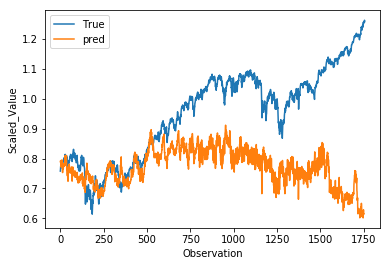

dict_keys(['loss', 'val_loss'])


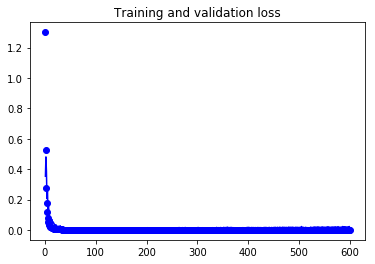

In [105]:
plot_model_architecture(model=model, file_name=file_name)
y_pred = predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,
                  vex_sign=vex_sign_test,cave_sign=cave_sign_test,
                  predict_imagepath=predict_imagepath, file_name=file_name)
loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name)
save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,
             file_name=file_name,test_date=test_date)

# tcn9~11 change filter size

In [45]:
#tcn9
file_name='NYA_de5_clf_tcn9'
csv_logger = CSV(losspath=losspath, file_name=file_name)

In [46]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor, vex_sign, cave_sign = Input(shape=(1,X_train.shape[1],)), Input(shape=(None,)), Input(shape=(None,))
output = TCN(nb_filters=128, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16, 32], \
        activation='selu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.2, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model([input_tensor,vex_sign,cave_sign], output_tensor)
model.compile(optimizer=Adam(lr=0.0001, clipnorm=1, clipvalue=0.5), loss=tf_stock_loss_5(vex_sign=vex_sign,cave_sign=cave_sign))
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history_model = model.fit(x=[X_tr_t,vex_sign_train,cave_sign_train], y=y_train, epochs=400, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio, callbacks=[CSV(losspath=losspath, file_name=file_name)],
                                    shuffle=False)




Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 128)       6272        input_1[0][0]                    
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 128)       32896       tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation (Activation)         (None, 1, 128)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
______________________________________________________________________________________________

Epoch 1/400
6808/6808==============================] - 8s 1ms/sample - loss: 1.4326 - val_loss: 0.1463
Epoch 2/400
6808/6808==============================] - 5s 692us/sample - loss: 0.2417 - val_loss: 0.1728
Epoch 3/400
6808/6808==============================] - 5s 691us/sample - loss: 0.0992 - val_loss: 0.1795
Epoch 4/400
6808/6808==============================] - 5s 686us/sample - loss: 0.0523 - val_loss: 0.0998
Epoch 5/400
6808/6808==============================] - 5s 686us/sample - loss: 0.0315 - val_loss: 0.2079
Epoch 6/400
6808/6808==============================] - 5s 687us/sample - loss: 0.0238 - val_loss: 0.1708
Epoch 7/400
6808/6808==============================] - 5s 684us/sample - loss: 0.0208 - val_loss: 0.2423
Epoch 8/400
6808/6808==============================] - 5s 684us/sample - loss: 0.0185 - val_loss: 0.2282
Epoch 9/400
6808/6808==============================] - 5s 680us/sample - loss: 0.0166 - val_loss: 0.2444
Epoch 10/400
6808/6808==============================] - 5

6808/6808==============================] - 5s 682us/sample - loss: 8.4846e-04 - val_loss: 0.0082
Epoch 155/400
6808/6808==============================] - 5s 680us/sample - loss: 8.5820e-04 - val_loss: 0.0092
Epoch 156/400
6808/6808==============================] - 5s 679us/sample - loss: 8.8040e-04 - val_loss: 0.0088
Epoch 157/400
6808/6808==============================] - 5s 680us/sample - loss: 8.7070e-04 - val_loss: 0.0071
Epoch 158/400
6808/6808==============================] - 5s 676us/sample - loss: 9.3549e-04 - val_loss: 0.0123
Epoch 159/400
6808/6808==============================] - 5s 680us/sample - loss: 9.8964e-04 - val_loss: 0.0107
Epoch 160/400
6808/6808==============================] - 5s 679us/sample - loss: 9.3204e-04 - val_loss: 0.0060
Epoch 161/400
6808/6808==============================] - 5s 675us/sample - loss: 9.5647e-04 - val_loss: 0.0062
Epoch 162/400
6808/6808==============================] - 5s 679us/sample - loss: 8.7770e-04 - val_loss: 0.0052
Epoch 163/400
6

6808/6808==============================] - 5s 677us/sample - loss: 6.8967e-04 - val_loss: 0.0206
Epoch 229/400
6808/6808==============================] - 5s 682us/sample - loss: 5.7889e-04 - val_loss: 0.0229
Epoch 230/400
6808/6808==============================] - 5s 682us/sample - loss: 6.7904e-04 - val_loss: 0.0160
Epoch 231/400
6808/6808==============================] - 5s 682us/sample - loss: 7.4923e-04 - val_loss: 0.0304
Epoch 232/400
6808/6808==============================] - 5s 679us/sample - loss: 7.3304e-04 - val_loss: 0.0213
Epoch 233/400
6808/6808==============================] - 5s 682us/sample - loss: 6.2126e-04 - val_loss: 0.0216
Epoch 234/400
6808/6808==============================] - 5s 686us/sample - loss: 5.8871e-04 - val_loss: 0.0211
Epoch 235/400
6808/6808==============================] - 5s 678us/sample - loss: 6.1800e-04 - val_loss: 0.0159
Epoch 236/400
6808/6808==============================] - 5s 682us/sample - loss: 6.3567e-04 - val_loss: 0.0110
Epoch 237/400
6

Epoch 302/400
6808/6808==============================] - 5s 684us/sample - loss: 4.5427e-04 - val_loss: 0.0160
Epoch 303/400
6808/6808==============================] - 5s 680us/sample - loss: 4.6472e-04 - val_loss: 0.0126
Epoch 304/400
6808/6808==============================] - 5s 674us/sample - loss: 4.6685e-04 - val_loss: 0.0120
Epoch 305/400
6808/6808==============================] - 5s 684us/sample - loss: 5.2530e-04 - val_loss: 0.0164
Epoch 306/400
6808/6808==============================] - 5s 682us/sample - loss: 4.7583e-04 - val_loss: 0.0200
Epoch 307/400
6808/6808==============================] - 5s 682us/sample - loss: 5.2721e-04 - val_loss: 0.0146
Epoch 308/400
6808/6808==============================] - 5s 687us/sample - loss: 5.6987e-04 - val_loss: 0.0160
Epoch 309/400
6808/6808==============================] - 5s 677us/sample - loss: 5.6273e-04 - val_loss: 0.0205
Epoch 310/400
6808/6808==============================] - 5s 682us/sample - loss: 5.8536e-04 - val_loss: 0.0135
E

Epoch 376/400
6808/6808==============================] - 5s 676us/sample - loss: 4.6866e-04 - val_loss: 0.0266
Epoch 377/400
6808/6808==============================] - 5s 675us/sample - loss: 4.3680e-04 - val_loss: 0.0232
Epoch 378/400
6808/6808==============================] - 5s 680us/sample - loss: 4.4922e-04 - val_loss: 0.0150
Epoch 379/400
6808/6808==============================] - 5s 679us/sample - loss: 4.9400e-04 - val_loss: 0.0106
Epoch 380/400
6808/6808==============================] - 5s 677us/sample - loss: 4.5825e-04 - val_loss: 0.0116
Epoch 381/400
6808/6808==============================] - 5s 684us/sample - loss: 4.4830e-04 - val_loss: 0.0139
Epoch 382/400
6808/6808==============================] - 5s 682us/sample - loss: 4.6034e-04 - val_loss: 0.0125
Epoch 383/400
6808/6808==============================] - 5s 679us/sample - loss: 4.4767e-04 - val_loss: 0.0105
Epoch 384/400
6808/6808==============================] - 5s 682us/sample - loss: 5.7062e-04 - val_loss: 0.0139
E

y_pred.shape: (1756, 1)
y_test_rsquare.shape: (1756,)
R-Squared: 0.699334
The Adjusted R2 score on the Test set is:	0.691


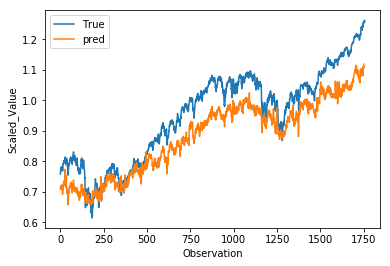

dict_keys(['loss', 'val_loss'])


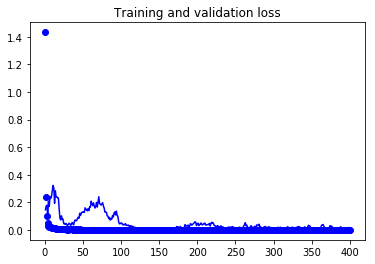

In [47]:
plot_model_architecture(model=model, file_name=file_name)
y_pred = predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,
                  vex_sign=vex_sign_test,cave_sign=cave_sign_test,
                  predict_imagepath=predict_imagepath, file_name=file_name)
loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name)
save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,
             file_name=file_name,test_date=test_date)

In [92]:
#tcn10
file_name='NYA_de5_clf_tcn10'


In [56]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor, vex_sign, cave_sign = Input(shape=(1,X_train.shape[1],)), Input(shape=(None,)), Input(shape=(None,))
output = TCN(nb_filters=256, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16, 32], \
        activation='selu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.2, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model([input_tensor,vex_sign,cave_sign], output_tensor)
model.compile(optimizer=Adam(lr=0.0001, clipnorm=1, clipvalue=0.5), loss=tf_stock_loss_5(vex_sign=vex_sign,cave_sign=cave_sign))
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history_model = model.fit(x=[X_tr_t,vex_sign_train,cave_sign_train], y=y_train, epochs=400, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio, callbacks=[CSV(losspath=losspath, file_name=file_name)],
                                    shuffle=False)





Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 256)       12544       input_5[0][0]                    
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 256)       131328      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_7 (Activation)       (None, 1, 256)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
____________________________________________________________________________________________

Epoch 1/400
6808/6808==============================] - 7s 956us/sample - loss: 1.5951 - val_loss: 1.02040s - loss: 1.60
Epoch 2/400
6808/6808==============================] - 5s 722us/sample - loss: 0.3330 - val_loss: 0.4944.333
Epoch 3/400
6808/6808==============================] - 5s 712us/sample - loss: 0.1344 - val_loss: 0.5591
Epoch 4/400
6808/6808==============================] - 5s 711us/sample - loss: 0.0979 - val_loss: 0.6524
Epoch 5/400
6808/6808==============================] - 5s 712us/sample - loss: 0.0565 - val_loss: 0.6965
Epoch 6/400
6808/6808==============================] - 5s 709us/sample - loss: 0.0438 - val_loss: 0.5958loss: 0.043
Epoch 7/400
6808/6808==============================] - 5s 703us/sample - loss: 0.0346 - val_loss: 0.2216
Epoch 8/400
6808/6808==============================] - 5s 703us/sample - loss: 0.0296 - val_loss: 0.0769
Epoch 9/400
6808/6808==============================] - 5s 708us/sample - loss: 0.0212 - val_loss: 0.0819
Epoch 10/400
6808/6808===

Epoch 78/400
6808/6808==============================] - 5s 691us/sample - loss: 0.0015 - val_loss: 0.0583
Epoch 79/400
6808/6808==============================] - 5s 701us/sample - loss: 0.0016 - val_loss: 0.0284
Epoch 80/400
6808/6808==============================] - 5s 694us/sample - loss: 0.0013 - val_loss: 0.0316
Epoch 81/400
6808/6808==============================] - 5s 694us/sample - loss: 0.0014 - val_loss: 0.0397
Epoch 82/400
6808/6808==============================] - 5s 693us/sample - loss: 0.0014 - val_loss: 0.0309
Epoch 83/400
6808/6808==============================] - 5s 699us/sample - loss: 0.0016 - val_loss: 0.0473
Epoch 84/400
6808/6808==============================] - 5s 696us/sample - loss: 0.0014 - val_loss: 0.0323
Epoch 85/400
6808/6808==============================] - 5s 701us/sample - loss: 0.0014 - val_loss: 0.0240
Epoch 86/400
6808/6808==============================] - 5s 695us/sample - loss: 0.0018 - val_loss: 0.0205
Epoch 87/400
6808/6808========================

6808/6808==============================] - 5s 685us/sample - loss: 5.2977e-04 - val_loss: 0.0267
Epoch 225/400
6808/6808==============================] - 5s 680us/sample - loss: 7.2648e-04 - val_loss: 0.0280
Epoch 226/400
6808/6808==============================] - 5s 692us/sample - loss: 6.2096e-04 - val_loss: 0.0250
Epoch 227/400
6808/6808==============================] - 5s 696us/sample - loss: 6.0240e-04 - val_loss: 0.0273
Epoch 228/400
6808/6808==============================] - 5s 695us/sample - loss: 5.9513e-04 - val_loss: 0.0381
Epoch 229/400
6808/6808==============================] - 5s 701us/sample - loss: 5.6251e-04 - val_loss: 0.0443
Epoch 230/400
6808/6808==============================] - 5s 701us/sample - loss: 6.2389e-04 - val_loss: 0.0304
Epoch 231/400
6808/6808==============================] - 5s 700us/sample - loss: 5.4476e-04 - val_loss: 0.0300
Epoch 232/400
6808/6808==============================] - 5s 694us/sample - loss: 5.5236e-04 - val_loss: 0.0288
Epoch 233/400
6

6808/6808==============================] - 5s 708us/sample - loss: 4.3288e-04 - val_loss: 0.0186
Epoch 371/400
6808/6808==============================] - 5s 693us/sample - loss: 3.9232e-04 - val_loss: 0.0146s
Epoch 372/400
6808/6808==============================] - 5s 707us/sample - loss: 3.6088e-04 - val_loss: 0.0129
Epoch 373/400
6808/6808==============================] - 5s 695us/sample - loss: 4.0560e-04 - val_loss: 0.0129A: 0s - lo
Epoch 374/400
6808/6808==============================] - 5s 694us/sample - loss: 4.0259e-04 - val_loss: 0.0210
Epoch 375/400
6808/6808==============================] - 5s 701us/sample - loss: 4.2728e-04 - val_loss: 0.0243
Epoch 376/400
6808/6808==============================] - 5s 699us/sample - loss: 3.9496e-04 - val_loss: 0.0231- ETA: 1s -  - ETA: 0s - loss: 3.5
Epoch 377/400
6808/6808==============================] - 5s 696us/sample - loss: 4.4391e-04 - val_loss: 0.0179A: 0s - l
Epoch 378/400
6808/6808==============================] - 5s 701us/sample

TypeError: plot_model_architecture() got an unexpected keyword argument 'model_name'

y_pred.shape: (1756, 1)
y_test_rsquare.shape: (1756,)
R-Squared: 0.799419
The Adjusted R2 score on the Test set is:	0.794


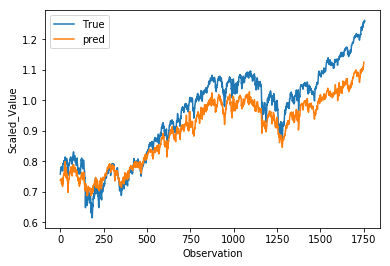

dict_keys(['loss', 'val_loss'])


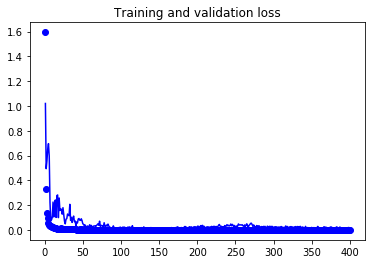

In [57]:
plot_model_architecture(model=model, file_name=file_name)
y_pred = predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,
                  vex_sign=vex_sign_test,cave_sign=cave_sign_test,
                  predict_imagepath=predict_imagepath, file_name=file_name)
loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name)
save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,
             file_name=file_name,test_date=test_date)

In [93]:
#tcn11
file_name='NYA_de5_clf_tcn11'

In [94]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor, vex_sign, cave_sign = Input(shape=(1,X_train.shape[1],)), Input(shape=(None,)), Input(shape=(None,))
output = TCN(nb_filters=512, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16, 32], \
        activation='selu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.2, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model([input_tensor,vex_sign,cave_sign], output_tensor)
model.compile(optimizer=Adam(lr=0.0001, clipnorm=1, clipvalue=0.5), loss=tf_stock_loss_5(vex_sign=vex_sign,cave_sign=cave_sign))
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history_model = model.fit(x=[X_tr_t,vex_sign_train,cave_sign_train], y=y_train, epochs=400, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio, callbacks=[CSV(losspath=losspath, file_name=file_name)],
                                    shuffle=False)





Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 512)       25088       input_3[0][0]                    
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 512)       524800      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_14 (Activation)      (None, 1, 512)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
____________________________________________________________________________________________

Epoch 1/400
6808/6808==============================] - 10s 2ms/sample - loss: 1.8452 - val_loss: 0.5200
Epoch 2/400
6808/6808==============================] - 6s 926us/sample - loss: 0.4702 - val_loss: 0.1234
Epoch 3/400
6808/6808==============================] - 6s 923us/sample - loss: 0.2038 - val_loss: 0.3729
Epoch 4/400
6808/6808==============================] - 6s 928us/sample - loss: 0.1412 - val_loss: 0.0796
Epoch 5/400
6808/6808==============================] - 6s 922us/sample - loss: 0.0753 - val_loss: 0.0625
Epoch 6/400
6808/6808==============================] - 6s 924us/sample - loss: 0.0663 - val_loss: 0.6817
Epoch 7/400
6808/6808==============================] - 6s 931us/sample - loss: 0.0459 - val_loss: 0.1497
Epoch 8/400
6808/6808==============================] - 6s 927us/sample - loss: 0.0467 - val_loss: 0.3934
Epoch 9/400
6808/6808==============================] - 6s 924us/sample - loss: 0.0384 - val_loss: 0.0658
Epoch 10/400
6808/6808==============================] - 

6808/6808==============================] - 6s 929us/sample - loss: 6.3523e-04 - val_loss: 0.0292
Epoch 153/400
6808/6808==============================] - 6s 929us/sample - loss: 6.1801e-04 - val_loss: 0.0259
Epoch 154/400
6808/6808==============================] - 6s 922us/sample - loss: 6.2268e-04 - val_loss: 0.0301
Epoch 155/400
6808/6808==============================] - 6s 920us/sample - loss: 6.6030e-04 - val_loss: 0.0273
Epoch 156/400
6808/6808==============================] - 6s 927us/sample - loss: 6.5161e-04 - val_loss: 0.0257
Epoch 157/400
6808/6808==============================] - 6s 924us/sample - loss: 6.4675e-04 - val_loss: 0.0296
Epoch 158/400
6808/6808==============================] - 6s 924us/sample - loss: 5.9429e-04 - val_loss: 0.0248
Epoch 159/400
6808/6808==============================] - 6s 928us/sample - loss: 5.9909e-04 - val_loss: 0.0267
Epoch 160/400
6808/6808==============================] - 6s 922us/sample - loss: 5.6150e-04 - val_loss: 0.0228
Epoch 161/400
6

Epoch 226/400
6808/6808==============================] - 6s 910us/sample - loss: 4.5904e-04 - val_loss: 0.0134
Epoch 227/400
6808/6808==============================] - 6s 917us/sample - loss: 4.4276e-04 - val_loss: 0.0105
Epoch 228/400
6808/6808==============================] - 6s 911us/sample - loss: 4.7592e-04 - val_loss: 0.0129
Epoch 229/400
6808/6808==============================] - 6s 914us/sample - loss: 4.6485e-04 - val_loss: 0.0094
Epoch 230/400
6808/6808==============================] - 6s 909us/sample - loss: 4.5944e-04 - val_loss: 0.0097
Epoch 231/400
6808/6808==============================] - 6s 908us/sample - loss: 4.3943e-04 - val_loss: 0.0114
Epoch 232/400
6808/6808==============================] - 6s 909us/sample - loss: 4.7239e-04 - val_loss: 0.0108
Epoch 233/400
6808/6808==============================] - 6s 913us/sample - loss: 4.6855e-04 - val_loss: 0.0114
Epoch 234/400
6808/6808==============================] - 6s 907us/sample - loss: 4.7691e-04 - val_loss: 0.0113
E

Epoch 300/400
6808/6808==============================] - 6s 911us/sample - loss: 4.0138e-04 - val_loss: 0.0072
Epoch 301/400
6808/6808==============================] - 6s 912us/sample - loss: 4.2189e-04 - val_loss: 0.0091
Epoch 302/400
6808/6808==============================] - 6s 918us/sample - loss: 4.1700e-04 - val_loss: 0.0066
Epoch 303/400
6808/6808==============================] - 6s 917us/sample - loss: 4.0086e-04 - val_loss: 0.0088
Epoch 304/400
6808/6808==============================] - 6s 910us/sample - loss: 4.1430e-04 - val_loss: 0.0088
Epoch 305/400
6808/6808==============================] - 6s 906us/sample - loss: 4.0739e-04 - val_loss: 0.0077
Epoch 306/400
6808/6808==============================] - 6s 915us/sample - loss: 4.0386e-04 - val_loss: 0.0111
Epoch 307/400
6808/6808==============================] - 6s 912us/sample - loss: 4.2749e-04 - val_loss: 0.0121
Epoch 308/400
6808/6808==============================] - 6s 913us/sample - loss: 4.3165e-04 - val_loss: 0.0111
E

Epoch 374/400
6808/6808==============================] - 6s 912us/sample - loss: 4.3255e-04 - val_loss: 0.0141
Epoch 375/400
6808/6808==============================] - 6s 911us/sample - loss: 4.2458e-04 - val_loss: 0.0129
Epoch 376/400
6808/6808==============================] - 6s 913us/sample - loss: 4.2015e-04 - val_loss: 0.0176
Epoch 377/400
6808/6808==============================] - 6s 913us/sample - loss: 4.3851e-04 - val_loss: 0.0151
Epoch 378/400
6808/6808==============================] - 6s 906us/sample - loss: 4.2388e-04 - val_loss: 0.0198
Epoch 379/400
6808/6808==============================] - 6s 915us/sample - loss: 4.4003e-04 - val_loss: 0.0233
Epoch 380/400
6808/6808==============================] - 6s 912us/sample - loss: 4.2262e-04 - val_loss: 0.0163
Epoch 381/400
6808/6808==============================] - 6s 910us/sample - loss: 4.0925e-04 - val_loss: 0.0145
Epoch 382/400
6808/6808==============================] - 6s 910us/sample - loss: 4.1556e-04 - val_loss: 0.0206
E

y_pred.shape: (1756, 1)
y_test_rsquare.shape: (1756,)
R-Squared: 0.803970
The Adjusted R2 score on the Test set is:	0.798


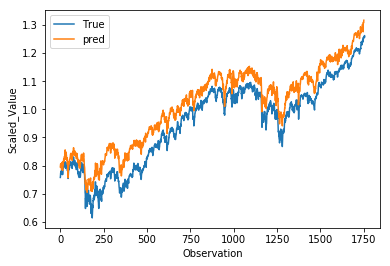

dict_keys(['loss', 'val_loss'])


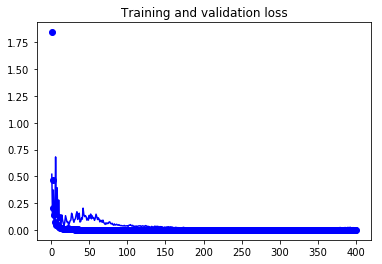

In [95]:
plot_model_architecture(model=model, file_name=file_name)
y_pred = predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,
                  vex_sign=vex_sign_test,cave_sign=cave_sign_test,
                  predict_imagepath=predict_imagepath, file_name=file_name)
loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name)
save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,
             file_name=file_name,test_date=test_date)